In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
import datetime
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
warnings.filterwarnings("ignore")

## Load User's songs data from folder

In [3]:
# Path to the folder containing the CSV files
folder_path = '../backend/data/userdata/'

In [4]:
file_name = 'spotify_Sachin Sharma.csv'

In [5]:
folder_path+file_name

'../backend/data/userdata/spotify_Sachin Sharma.csv'

In [6]:
#load single user df
user_df = pd.read_csv(folder_path+file_name)

In [7]:
user_df

artist_name                                         track_name  \
0     Harold Faltermeyer       Axel F - From "Beverly Hills Cop" Soundtrack   
1               CHANMINA                                      Never Grow Up   
2          Chester Nebro                                            My Gang   
3                 BVNDIT                                               Dumb   
4                Badshah  Garmi (From "Street Dancer 3D") (feat. Varun D...   
5                   Sade                                        Punch Drunk   
6            Party Favor                                              Bap U   
7   Relax Meditate Sleep  Borneo Jungle Oasis For Deep Sleep With Nature...   
8             Steve Aoki  Shakalaka (Steve Aoki, Deorro, MAKJ & Max Styler)   
9           DEAN FUJIOKA                                        Made In JPN   
10            Sohail Sen              Shaitan Ka Saala (From "Housefull 4")   
11              Ofenbach                                             Insane   
12              Lou Reed                              Walk on the Wild Side   
13         Yash Narvekar                  Muqabla (From "Street Dancer 3D")   
14         Macross 82-99         Cherry (feat. Night Tempo & Punipunidenki)   
15                Frenna                                        Mami So Bad   
16         Big Baby Tape                                     Gimme The Loot   
17         Ranveer Singh                                   Apna Time Aayega   
18         Marc Benjamin                                       All The Time   
19             La Bouche                                        Be My Lover   
20          David Guetta                         The Alphabeat - Radio Edit   
21            Dino James                                           Dooriyan   
22         Ranveer Singh                                       Asli Hip Hop   
23            Luca Testa                                            Gam Gam   
24                O-Zone               Dragostea Din Tei - Romanian Version   
25                 Balti                                            Filamén   
26                Patron                                               Goal   
27           Keanu Silva                                           Fine Day   
28             Freestyle                                The Party Has Begun   
29           Will Sparks                                 Catch - Radio Edit   
30                 QARAN                             Ki Kehna (feat. R3HAB)   
31               Borgore                          Unicorn Zombie Apocalypse   
32              chelmico                                        Easy Breezy   
33        Sakurako Ohara                                           Amazing!   
34      Barcode Brothers                                              Flute   
35            Deep Jandu                                   Bombay to Punjab   
36           Party Favor                                              Bap U   
37                   TJR                                        Funky Vodka   
38           Kaam Bhaari                                           Mohabbat   
39          Rick Wakeman                                Catherine Of Aragon   
40      Sick Individuals                     Walk Away - Rich Edwards Remix   
41                   BoA                                               AMOR   
42                Avoure                                        Aura - Edit   
43              Dua Lipa                              Blow Your Mind (Mwah)   
44                The HU             Yuve Yuve Yu (feat. From Ashes to New)   
45           Fotty Seven                                          Haan Bhai   
46              Bakermat                                           Uitzicht   
47          Philanthrope                                            Silence   
48          Gregor Salto                                             Azumba   
49                O-Zone      Dragostea Din Tei - Original Roma

In [8]:
user_df.shape

(50, 21)

In [9]:
user_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'user_name', 'played_at'],
      dtype='object')

## Load Spotify 1 million tracks dataset

In [10]:
# filename = "traindata/spotify_data.csv"
filename = "../backend/data/spotify_data.csv"
def get_data(filename):
    missing_values = ["n/a", "na", "--", " ", "N/A", "NA"]
    return pd.read_csv(filename,na_values = missing_values,sep=",")
songs_df = get_data(filename)

In [11]:
songs_df.head()

artist_name             track_name                track_id  \
0                      Rill                  Lolly  0000vdREvCVMxbQTkS888c   
1  Half Japanese Ira Kaplan   Eye Of The Hurricane  0001Lyv0YTjkZSqzT4WkLy   
2                 Ravenscry    Nothing but a Shade  0001piYJu94Ec4hJFytG5G   
3  Deva Vaali K. S. Chithra  Yamuna Nathi Karaiyil  0003ilHWJH7c5UtjKLPiC9   
4                  SadDoLLs       Space Loneliness  0005VnpISGYLSGrXg9TEJS   

   popularity  year         genre  danceability  energy  key  loudness  ...  \
0          26  2022  classic rock         0.910   0.374    8    -9.844  ...   
1           0  1993    noise rock         0.490   0.912    2   -11.245  ...   
2           3  2017          goth         0.522   0.929    0    -5.823  ...   
3           1  1993     tamil pop         0.765   0.676  1.0    -9.427  ...   
4           1  2009   heavy-metal         0.297   0.276    5   -10.937  ...   

  speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0      0.1990      0.075700          0.003010    0.1540   0.4320  104.042   
1      0.0522      0.261000          0.012800    0.0617   0.1150  134.867   
2      0.0620      0.000207          0.000016    0.2150   0.4100  160.035   
3      0.0450      0.430000          0.000002    0.2720   0.8950  133.554   
4      0.0410      0.465000          0.763000    0.1070   0.0332  125.159   

   duration_ms  time_signature   locale       locale_grouped  
0     160725.0               0   German             European  
1     188973.0               0  English  Mainstream / Global  
2     198587.0               4  English  Mainstream / Global  
3     304170.0               4    Tamil          South Asian  
4     182117.0               4  English  Mainstream / Global  

[5 rows x 21 columns]

In [12]:
songs_df.shape

(1722071, 21)

In [13]:
songs_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'locale', 'locale_grouped'],
      dtype='object')

## Drop Unnamed column

In [14]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in songs_df.columns:
    songs_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [15]:
songs_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'locale', 'locale_grouped'],
      dtype='object')

## EDA on User dataframe

### Fill na values in genre

In [16]:
#let's fill null genre columns
user_df['genre'] = user_df['genre'].fillna('Unknown')

In [17]:
print(user_df.isnull().sum())

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
language            0
user_name           0
played_at           0
dtype: int64


### 1. Basic Descriptive Statistics: Provides summary statistics for numeric columns.

In [18]:
# Basic Descriptive Statistics
print("Descriptive Statistics:")
print(user_df.describe())

Descriptive Statistics:
       popularity         year  danceability    energy        key   loudness  \
count   50.000000    50.000000      50.00000  50.00000  50.000000  50.000000   
mean    42.440000  2013.680000       0.67694   0.74588   4.280000  -6.563200   
std     21.357176    10.570347       0.12966   0.20290   3.758202   3.866715   
min      0.000000  1972.000000       0.32900   0.18300   0.000000 -20.217000   
25%     30.250000  2013.250000       0.61500   0.64125   1.000000  -8.331000   
50%     46.500000  2018.000000       0.66950   0.78400   3.000000  -5.534500   
75%     57.750000  2019.000000       0.79400   0.89175   7.750000  -3.969000   
max     73.000000  2020.000000       0.88100   0.99300  11.000000  -1.784000   

            mode  speechiness  acousticness  instrumentalness   liveness  \
count  50.000000    50.000000     50.000000         50.000000  50.000000   
mean    0.480000     0.122752      0.170403          0.204013   0.184924   
std     0.504672     0.1216

### 2. Genre Distribution: Visualizes the count of each genre in a bar plot.

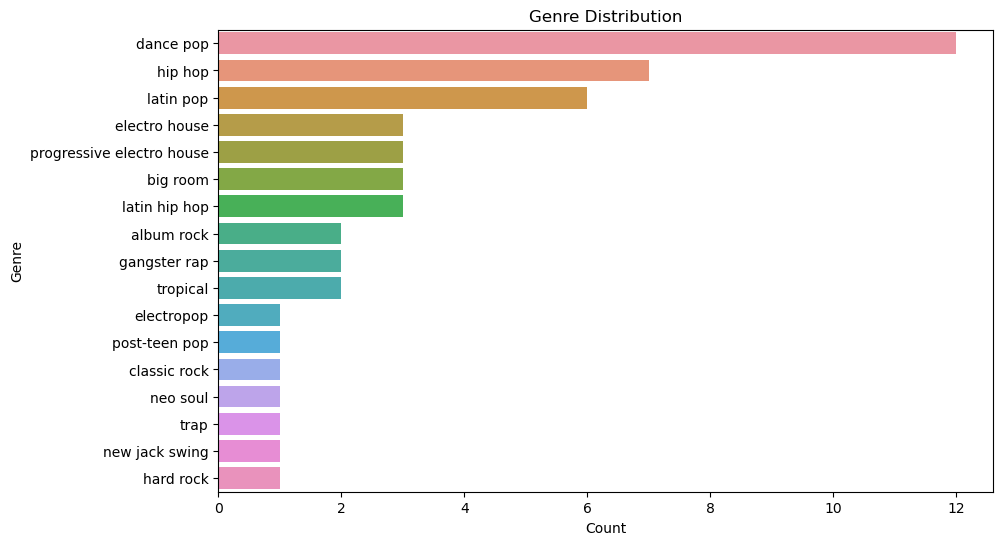

In [19]:
# Genre Distribution
plt.figure(figsize=(10, 6))
user_df['genre'] = user_df['genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)  # Join genre lists into strings if necessary
genre_counts = user_df['genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### 3. Popularity Analysis: Shows the distribution of song popularity using a histogram.

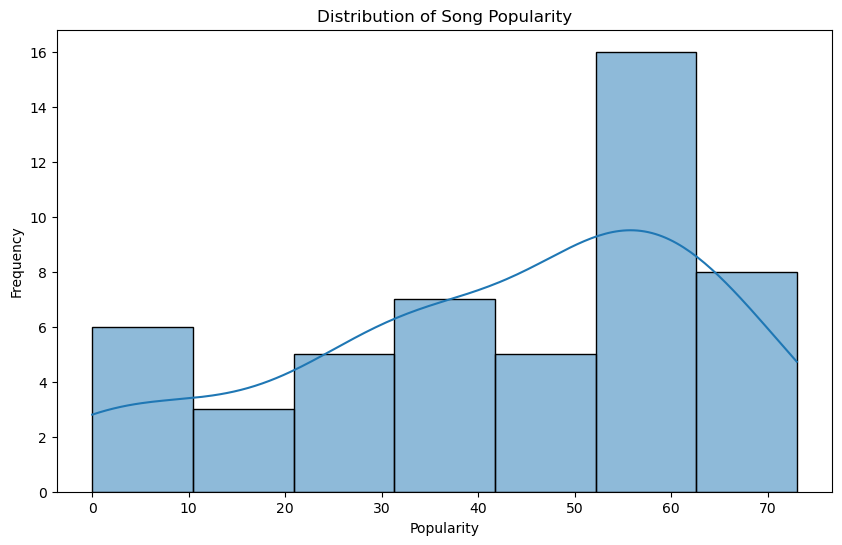

In [20]:
# Popularity Analysis
plt.figure(figsize=(10, 6))
sns.histplot(user_df['popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

### 4. Audio Features Analysis: Displays histograms for each audio feature to understand their distributions.

<Figure size 1500x1000 with 0 Axes>

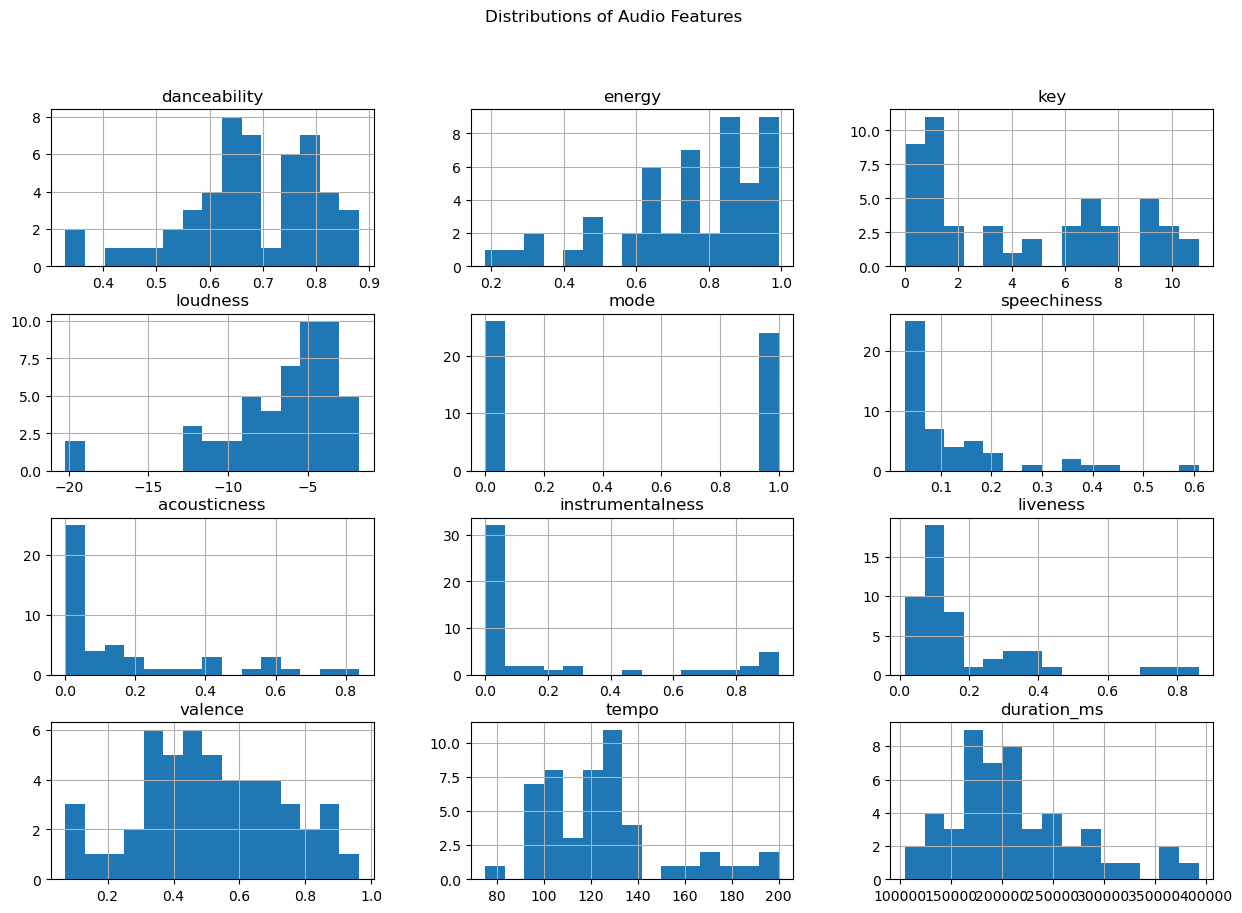

In [21]:
# Audio Features Analysis
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
plt.figure(figsize=(15, 10));
user_df[audio_features].hist(bins=15, figsize=(15, 10));
plt.suptitle('Distributions of Audio Features');
plt.show();

### 5. Year Analysis: Visualizes the distribution of song release years using a histogram.

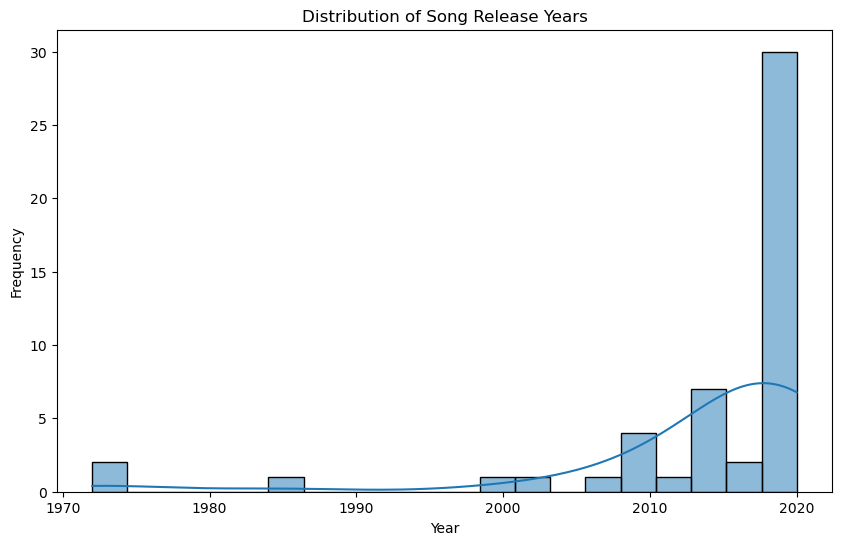

In [22]:
# Year Analysis
plt.figure(figsize=(10, 6))
sns.histplot(user_df['year'].astype(int), bins=20, kde=True)
plt.title('Distribution of Song Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show();

### 6. Top Artists: Displays a bar plot of the most frequently listened-to artists.

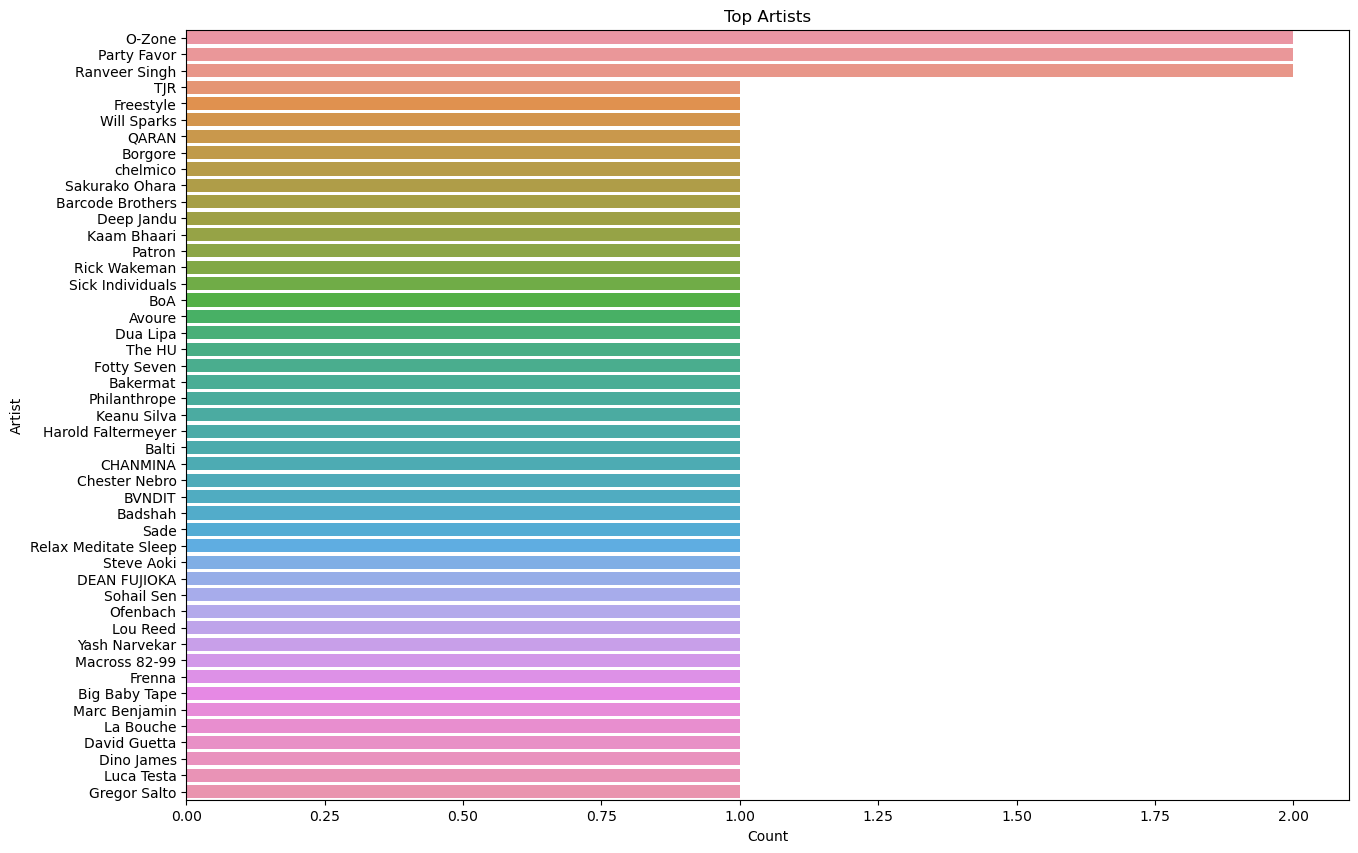

In [23]:
# Top Artists
plt.figure(figsize=(15, 10))
artist_counts = user_df['artist_name'].value_counts()
sns.barplot(x=artist_counts.values, y=artist_counts.index)
plt.title('Top Artists')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

### 7. Heatmap of Correlations: Shows the correlations between different audio features using a heatmap.

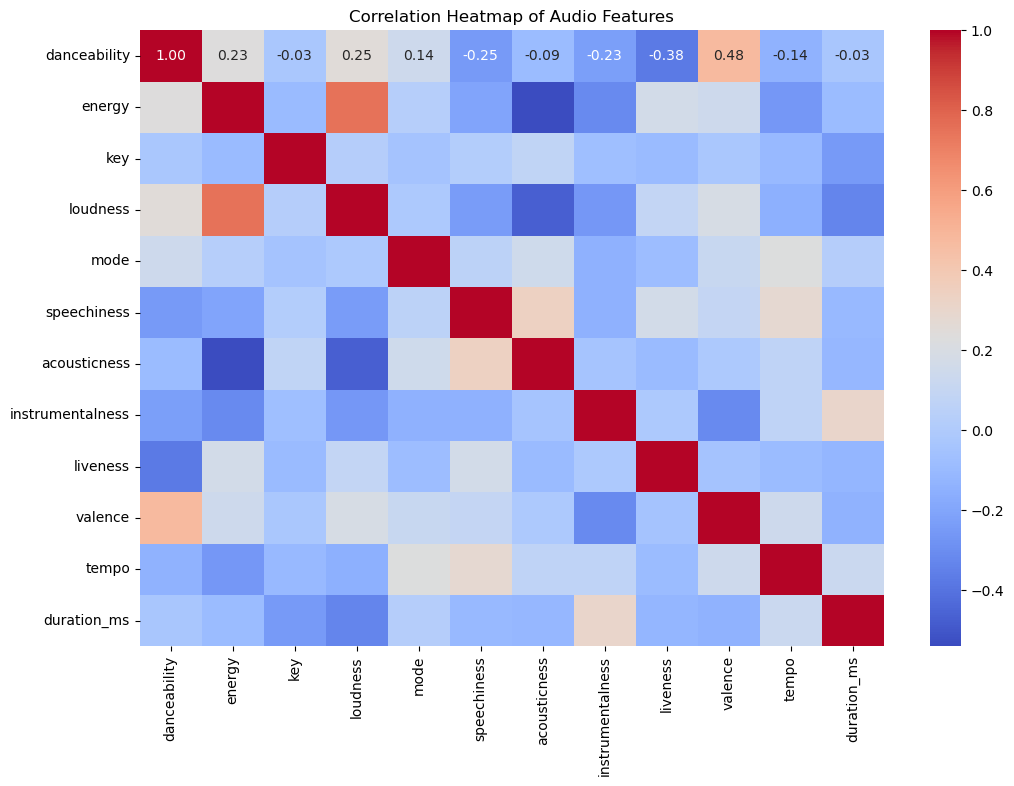

In [24]:
# Heatmap of Correlations
plt.figure(figsize=(12, 8))
corr = user_df[audio_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Audio Features')
plt.show()

### 8. Time-Series Analysis: Analyze the user's listening trends over time, such as weekly listening patterns.

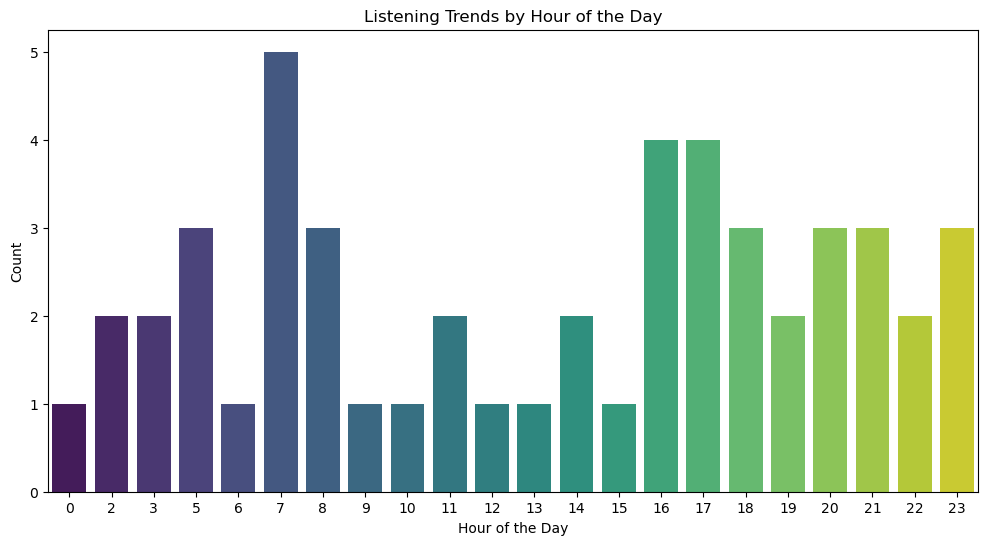

In [25]:
# Assuming 'played_at' column exists and is a datetime type
user_df['played_at'] = pd.to_datetime(user_df['played_at'])

# Extracting hour of the day
user_df['hour'] = user_df['played_at'].dt.hour

# Listening trends by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=user_df, palette='viridis')
plt.title('Listening Trends by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

### 9. Cluster Analysis: Group similar songs using k-means clustering on audio features.

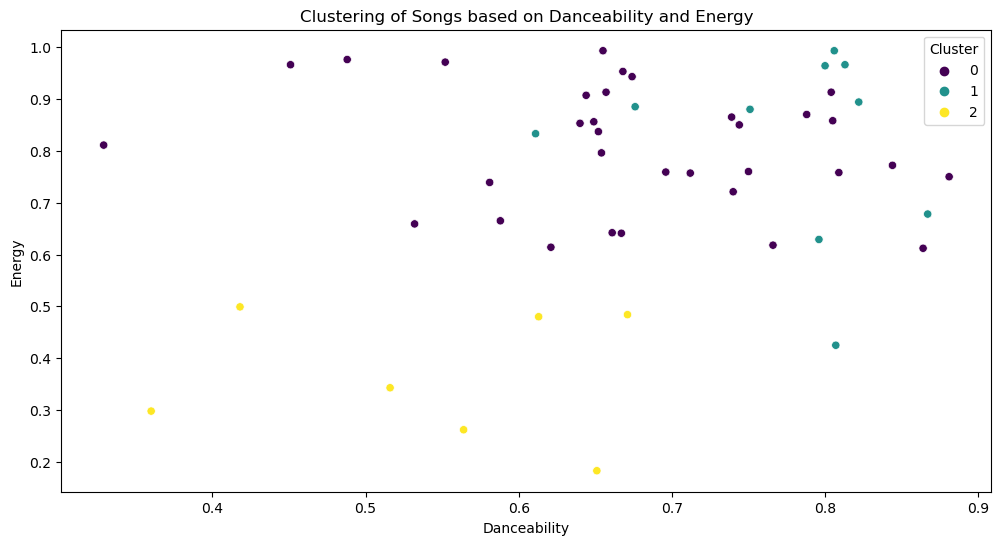

In [26]:
# Selecting audio features for clustering
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = user_df[audio_features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='danceability', y='energy', hue='cluster', palette='viridis', data=user_df)
plt.title('Clustering of Songs based on Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Cluster')
plt.show()


### 10. User Listening Behavior: Analyze listening behavior, such as morning vs. evening preferences.

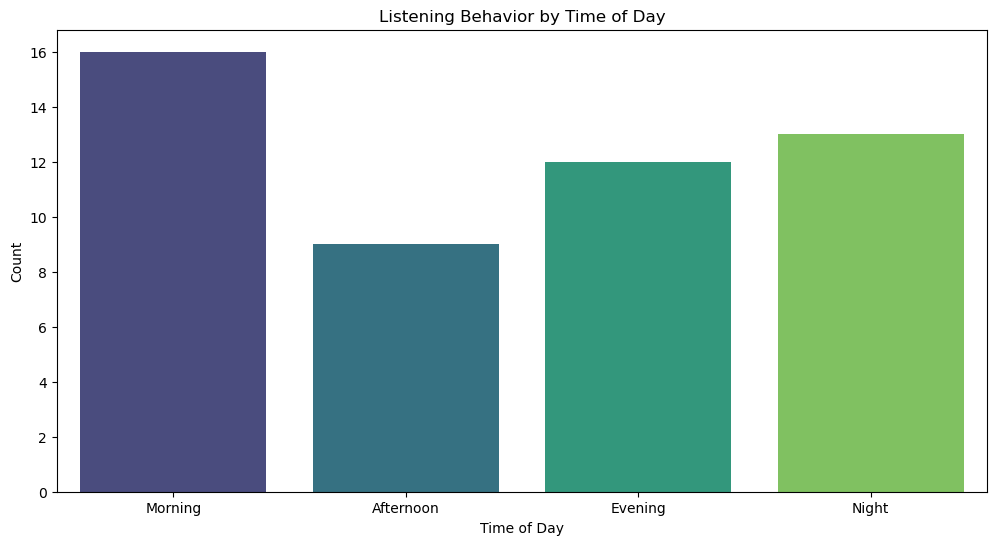

In [27]:
# Extracting time of day
user_df['time_of_day'] = user_df['played_at'].dt.hour.apply(lambda x: 'Morning' if 5 <= x < 12 else 'Afternoon' if 12 <= x < 17 else 'Evening' if 17 <= x < 21 else 'Night')

# Listening behavior by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='time_of_day', data=user_df, palette='viridis', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Listening Behavior by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()


### 11. User's language preferences

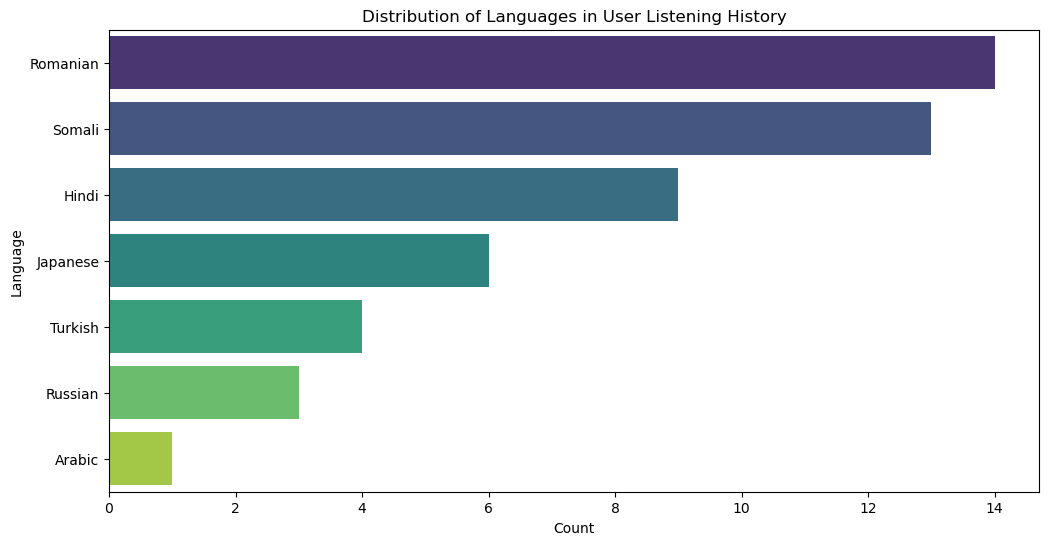

In [28]:
# Distribution of languages
plt.figure(figsize=(12, 6))
sns.countplot(y=user_df['language'], order=user_df['language'].value_counts().index, palette='viridis')
plt.title('Distribution of Languages in User Listening History')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

## EDA on 1 Processed million tracks dataset

In [29]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722071 entries, 0 to 1722070
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artist_name       object 
 1   track_name        object 
 2   track_id          object 
 3   popularity        int64  
 4   year              int64  
 5   genre             object 
 6   danceability      float64
 7   energy            float64
 8   key               object 
 9   loudness          float64
 10  mode              object 
 11  speechiness       float64
 12  acousticness      float64
 13  instrumentalness  float64
 14  liveness          float64
 15  valence           float64
 16  tempo             float64
 17  duration_ms       float64
 18  time_signature    int64  
 19  locale            object 
 20  locale_grouped    object 
dtypes: float64(10), int64(3), object(8)
memory usage: 275.9+ MB


In [30]:
# Check for missing values
df = songs_df.copy()

### Clean Locale column and replace with unknown.

In [31]:
df["locale"].unique()

array(['German', 'English', 'Tamil', 'Spanish', 'Portuguese', 'Hindi',
       'Punjabi', 'Swedish', 'Panjabi', 'Japanese', 'Korean', 'Dutch',
       'Tagalog', 'Hausa', 'Urdu', 'Danish', 'Italian', 'Chinese',
       'Norwegian', 'French', 'Polish', 'Cantonese', 'Estonian',
       'Gujarati', 'Russian', 'Assamese', 'Bengali', 'Brazilian',
       'Finnish', 'Indonesian', 'Brazilian portuguese', 'Arabic',
       'Telugu', 'Turkish', 'Afrikaans', 'Marathi', 'Yoruba', 'Mandarin',
       'Welsh', 'Swahili', 'Greek', 'Jamaican', 'Thai', 'Croatian',
       'Malayalam', 'Hebrew', 'Nigerian', 'Dagbamba', 'Persian',
       'Unknown', 'Latin', 'Catalan', 'Odia', 'Aragonese', 'Romanian',
       'Amharic', 'Somali', 'Slovenian', 'Haryanvi', 'Irish', 'Kannada',
       'Vietnamese', 'Ukrainian', 'Hawaiian', 'Shona', 'Rajasthani',
       'Latvian', 'Hungarian', 'Fon', 'Tamashek', 'Czech', 'Akan',
       'Old english', 'Galician', 'Bhojpuri', 'Lithuanian', 'Bulgarian',
       'Icelandic', 'Georgian', 'Y

In [32]:
sampled_df= df[['track_id', 'track_name', 'artist_name', 'year', 'genre', 'locale']]

There is missing in data
        column  # of missings
0  duration_ms            191


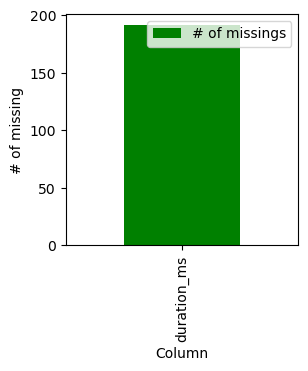

In [33]:
names = []
values = []
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        return True
    else:
        print("Data has no missing values")
        return False

if(check_missing(df)):
    for col_name in df.columns:
        if df[col_name].isnull().any() :
            #print(col_name + " column has "+str(df[col_name].isnull().sum())+" missing values")
            names.append(col_name)
            values.append(df[col_name].isnull().sum())
            
    missing = {"column":names,
              "# of missings":values}
    missingDf = pd.DataFrame(missing)
    print(missingDf)
    missingDf.plot.bar(x="column",y='# of missings', figsize=(3, 3), ylabel="# of missing", xlabel = "Column", color="green")

In [34]:
# Fill missing numerical values
df['popularity'].fillna(df['popularity'].median(), inplace=True)
df['key'].fillna(df['key'].mode()[0], inplace=True)
df['mode'].fillna(df['mode'].mode()[0], inplace=True)
df['instrumentalness'].fillna(0, inplace=True)  # Assuming missing means no instrumentalness
df['valence'].fillna(df['valence'].median(), inplace=True)
df['tempo'].fillna(df['tempo'].median(), inplace=True)
df['duration_ms'].fillna(df['duration_ms'].median(), inplace=True)
df['time_signature'].fillna(df['time_signature'].mode()[0], inplace=True)

# Drop rows with missing values in categorical columns
df.dropna(subset=['artist_name', 'track_name', 'locale'], inplace=True)

# Verify missing values are handled
print("Remaining missing values:\n", df.isnull().sum())


Remaining missing values:
 artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
locale              0
locale_grouped      0
dtype: int64


In [35]:
df = df.dropna()
assert check_missing(df) == False

Data has no missing values


### Check if there is any duplicates in the unique columns : track_id

In [36]:
def check_duplicated(df, column_name):
    duplicates_in_unique_column = df[df.duplicated(column_name)]
    duplicates_count = duplicates_in_unique_column.shape[0]
    if((duplicates_count) == 0) :
        print("There is no duplicated values in " + column_name)
    else:
        print("There is {duplicates_count} duplicated values in " + column_name)
        
check_duplicated(df, "track_id")

There is no duplicated values in track_id


### Check that all values of the column has the same data type

In [37]:
for col in df.columns :
    is_same_data_type = df[col].apply(lambda x: type(x)).nunique() == 1
    print(f"All values in '{col}' have the same data type: {is_same_data_type}")

All values in 'artist_name' have the same data type: True
All values in 'track_name' have the same data type: True
All values in 'track_id' have the same data type: True
All values in 'popularity' have the same data type: True
All values in 'year' have the same data type: True
All values in 'genre' have the same data type: True
All values in 'danceability' have the same data type: True
All values in 'energy' have the same data type: True
All values in 'key' have the same data type: True
All values in 'loudness' have the same data type: True
All values in 'mode' have the same data type: True
All values in 'speechiness' have the same data type: True
All values in 'acousticness' have the same data type: True
All values in 'instrumentalness' have the same data type: True
All values in 'liveness' have the same data type: True
All values in 'valence' have the same data type: True
All values in 'tempo' have the same data type: True
All values in 'duration_ms' have the same data type: True
All

In [38]:
#Sort tha data based on the song release year
df = df.sort_values(by=["year"],ascending=True)

# Define the valid year range
current_year = datetime.datetime.now().year
valid_year_range = (1950, current_year)

# Assuming the column is named 'year' or 'release_year'
if 'year' in df.columns:
    df = df[(df['year'] >= valid_year_range[0]) & (df['year'] <= valid_year_range[1])]

elif 'release_year' in df.columns:
    df = df[(df['release_year'] >= valid_year_range[0]) & (df['release_year'] <= valid_year_range[1])]

# Verify changes
print("Remaining invalid years:\n", df[['year']].dropna().describe())


Remaining invalid years:
                year
count  1.719711e+06
mean   2.010216e+03
std    1.044722e+01
min    1.950000e+03
25%    2.005000e+03
50%    2.012000e+03
75%    2.018000e+03
max    2.025000e+03


### 1. Get some descriptive statistics of the numerical columns in the DataFrame

In [39]:
summary_statistics =  df.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary_statistics

popularity        year  danceability      energy    loudness  \
count 1719711.000 1719711.000   1719711.000 1719711.000 1719711.000   
mean       17.503    2010.216         0.544       0.630     -10.875   
std        17.310      10.447         0.183       0.263     451.121   
min         0.000    1950.000        -1.000      -1.000 -100000.000   
25%         2.000    2005.000         0.422       0.446     -10.783   
50%        13.000    2012.000         0.557       0.674      -7.538   
75%        28.000    2018.000         0.682       0.856      -5.380   
max       100.000    2025.000         1.000       1.000       6.172   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count  1719711.000   1719711.000       1719711.000 1719711.000 1719711.000   
mean         0.090         0.322             0.195       0.224       0.464   
std          0.119         0.344             0.333       0.202       0.267   
min         -1.000        -1.000            -1.000      -1.000      -1.000   
25%          0.036         0.011             0.000       0.098       0.237   
50%          0.049         0.169             0.000       0.135       0.451   
75%          0.087         0.622             0.239       0.291       0.681   
max          0.971         1.000             1.000       1.000       1.000   

            tempo  duration_ms  time_signature  
count 1719711.000  1719711.000     1719711.000  
mean      121.634   244523.515           2.772  
std        29.831   133989.785           1.802  
min        -1.000     1586.000          -1.000  
25%        98.719   182373.000           0.000  
50%       121.438   224200.000           4.000  
75%       139.985   279253.000           4.000  
max       249.993  6000495.000          43.000

In [40]:
# Remove rows with loudness above 0
loudness_above_0 = df["loudness"] > 0
df = df[~loudness_above_0]

In [41]:
summary_statistics =  df.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary_statistics

popularity        year  danceability      energy    loudness  \
count 1718330.000 1718330.000   1718330.000 1718330.000 1718330.000   
mean       17.503    2010.212         0.544       0.630     -10.884   
std        17.311      10.448         0.183       0.263     451.302   
min         0.000    1950.000        -1.000      -1.000 -100000.000   
25%         2.000    2005.000         0.422       0.446     -10.786   
50%        13.000    2012.000         0.557       0.673      -7.541   
75%        28.000    2018.000         0.682       0.855      -5.385   
max       100.000    2025.000         1.000       1.000       0.000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count  1718330.000   1718330.000       1718330.000 1718330.000 1718330.000   
mean         0.090         0.322             0.195       0.224       0.464   
std          0.119         0.344             0.333       0.202       0.267   
min         -1.000        -1.000            -1.000      -1.000      -1.000   
25%          0.036         0.011             0.000       0.098       0.237   
50%          0.049         0.169             0.000       0.135       0.451   
75%          0.087         0.623             0.239       0.291       0.681   
max          0.971         1.000             1.000       1.000       1.000   

            tempo  duration_ms  time_signature  
count 1718330.000  1718330.000     1718330.000  
mean      121.626   244550.231           2.772  
std        29.828   134011.833           1.802  
min        -1.000     1586.000          -1.000  
25%        98.708   182400.000           0.000  
50%       121.424   224213.000           4.000  
75%       139.984   279267.000           4.000  
max       249.993  6000495.000          43.000

In [42]:
df.shape

(1718330, 21)

In [43]:
unique_counts_multiple_columns = df[['track_id', 'artist_name', 'year','genre','locale']].nunique()
unique_counts_multiple_columns

track_id       1718330
artist_name     147259
year                76
genre              705
locale             171
dtype: int64

### Remove rows with time_signature below 3

In [44]:
time_signature_below_3 = df["time_signature"] < 3
df = df[~time_signature_below_3]

In [45]:
unique_counts_multiple_columns = df[['track_id', 'artist_name', 'year','genre','locale']].nunique()
unique_counts_multiple_columns

track_id       1210748
artist_name      76712
year                54
genre              332
locale             170
dtype: int64

### 2. Number of tracks over years

Number of Tracks in Each Year:
    year  NumTracks
0   1971         12
1   1972         21
2   1973         60
3   1974         10
4   1975         19
5   1976          9
6   1977         36
7   1978         13
8   1979         31
9   1980         20
10  1981         35
11  1982        158
12  1983        170
13  1984        208
14  1985        250
15  1986        248
16  1987        205
17  1988        225
18  1989        289
19  1990        407
20  1991        262
21  1992        384
22  1993        341
23  1994        420
24  1995        413
25  1996        276
26  1997        374
27  1998        254
28  1999        230
29  2000      44084
30  2001      42769
31  2002      42798
32  2003      42985
33  2004      44089
34  2005      44652
35  2006      46264
36  2007      46867
37  2008      48422
38  2009      47753
39  2010      48026
40  2011      47815
41  2012      56220
42  2013      55301
43  2014      54952
44  2015      53465
45  2016      42817
46  2017      58219
47  2018 

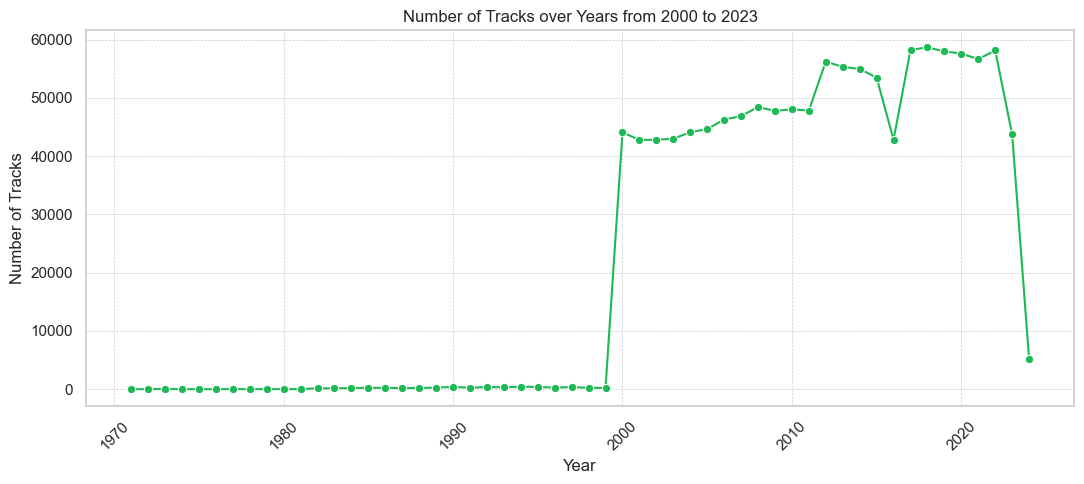

In [46]:
# Group by year and track_id to get the count of each track per year
count_tracks = df.groupby(['year', 'track_id']).size().reset_index(name='Count')

# Group by year to get the number of unique tracks per year
track_count_per_year = count_tracks.groupby('year')['track_id'].nunique().reset_index(name='NumTracks')

# Display the number of tracks per year
print("Number of Tracks in Each Year:")
print(track_count_per_year)

# Identify the year with the highest number of tracks
highest_year = track_count_per_year.loc[track_count_per_year['NumTracks'].idxmax(), 'year']
print("The year with the highest tracks released: ", highest_year)

# Identify the year with the lowest number of tracks
lowest_year = track_count_per_year.loc[track_count_per_year['NumTracks'].idxmin(), 'year']
print("The year with the lowest tracks released: ", lowest_year)

# Plot the number of tracks over the years
plt.figure(figsize=(11, 5))
sns.set(style="whitegrid")
sns.lineplot(x='year', y='NumTracks', data=track_count_per_year, color="#1DB954", marker='o')
plt.title('Number of Tracks over Years from 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Number of artists released tracks over years

Number of Artists who released tracks in Each Year:
    year  NumArtists
0   1971           2
1   1972           1
2   1973           3
3   1974           1
4   1975           2
5   1976           2
6   1977           9
7   1978           6
8   1979           6
9   1980           6
10  1981          13
11  1982          52
12  1983          58
13  1984          68
14  1985          70
15  1986          61
16  1987          58
17  1988          78
18  1989          59
19  1990          85
20  1991          80
21  1992         161
22  1993         195
23  1994         207
24  1995         186
25  1996         133
26  1997         140
27  1998         114
28  1999         114
29  2000        6195
30  2001        6264
31  2002        6621
32  2003        6693
33  2004        7221
34  2005        7572
35  2006        7914
36  2007        8373
37  2008        8676
38  2009        8679
39  2010        9174
40  2011        9352
41  2012       10313
42  2013       10681
43  2014       11251
44 

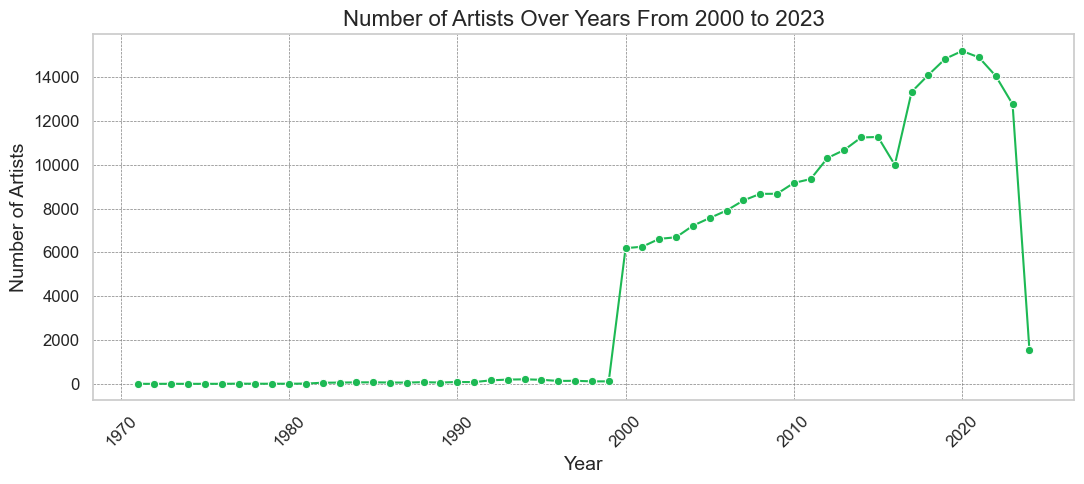

In [47]:
# Group by year and artist_name to get the count of releases per artist per year
artist_releases_per_year = df.groupby(['year', 'artist_name']).size().reset_index(name='Count')

# Group by year to get the number of unique artists per year
artist_count_per_year = artist_releases_per_year.groupby('year')['artist_name'].nunique().reset_index(name='NumArtists')

# Display the number of artists per year
print("Number of Artists who released tracks in Each Year:")
print(artist_count_per_year)

# Identify the year with the highest number of unique artists
highest_year = artist_count_per_year.loc[artist_count_per_year['NumArtists'].idxmax(), 'year']
print("The year with the highest number of Artists who released tracks: ", highest_year)

# Identify the year with the lowest number of unique artists
lowest_year = artist_count_per_year.loc[artist_count_per_year['NumArtists'].idxmin(), 'year']
print("The year with the lowest number of Artists who released tracks: ", lowest_year)

# Plot the number of unique artists over the years
plt.figure(figsize=(11, 5))
sns.set(style="whitegrid")  # Set the style to 'whitegrid' for a clean look
sns.lineplot(x='year', y='NumArtists', data=artist_count_per_year, color="#1DB954", marker='o')

plt.title('Number of Artists Over Years From 2000 to 2023', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Artists', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### 4. Number of Tracks in each Genre

Genre with the Highest Number of Tracks: k-pop
Genre with the Lowest Number of Tracks: acoustic pop


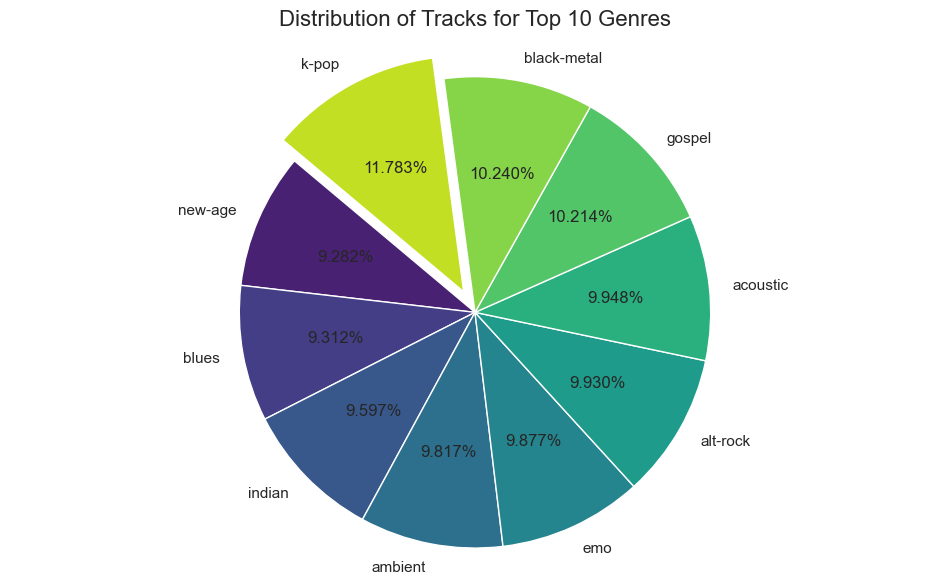

In [48]:
# Group by genre and track_id to get the count of each track per genre
count_tracks_genres = df.groupby(['genre', 'track_id']).size().reset_index(name='track_genre_count')

# Group by genre to get the number of unique tracks per genre
tracks_count_per_genre = count_tracks_genres.groupby('genre')['track_id'].nunique().reset_index(name='num_tracks_per_genre')

# Identify the genre with the highest and lowest number of tracks
max_genre_tracks = tracks_count_per_genre.loc[tracks_count_per_genre['num_tracks_per_genre'].idxmax(), 'genre']
min_genre_tracks = tracks_count_per_genre.loc[tracks_count_per_genre['num_tracks_per_genre'].idxmin(), 'genre']
print("Genre with the Highest Number of Tracks:", max_genre_tracks)
print("Genre with the Lowest Number of Tracks:", min_genre_tracks)

# Sort the genres by the number of tracks in ascending order
tracks_count_per_genre = tracks_count_per_genre.sort_values(by="num_tracks_per_genre", ascending=True)

# Get the top 10 genres with the highest number of tracks
top10_genres = tracks_count_per_genre[-10:]

# Plot the distribution of tracks for the top 10 genres
plt.figure(figsize=(12, 7))
colors = sns.color_palette("viridis", n_colors=10)  # Use a better color palette for the pie chart
explode = [0.1 if genre == max_genre_tracks else 0 for genre in top10_genres['genre']]
plt.pie(top10_genres['num_tracks_per_genre'], labels=top10_genres['genre'], autopct='%1.3f%%', explode=explode, colors=colors, startangle=140)
plt.title('Distribution of Tracks for Top 10 Genres', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()


### 5. Most popular tracks

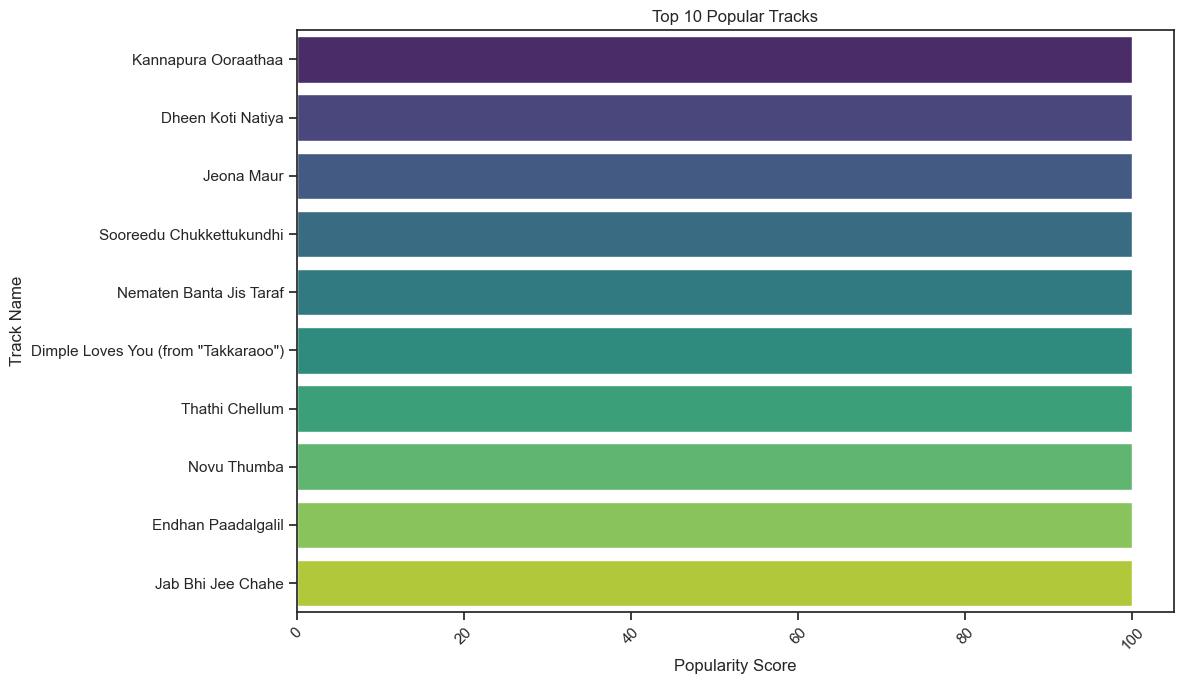

In [49]:
# Select relevant columns for popularity analysis
popularity_subset = df[['track_name', 'track_id', 'popularity']]

# Sort tracks by popularity in ascending order
popularity_subset_sorted = popularity_subset.sort_values(by="popularity", ascending=True)

# Select the top 10 most popular tracks
top10_popular_tracks = popularity_subset_sorted[-10:]

# Plot the top 10 popular tracks
plt.figure(figsize=(12, 7))
sns.set(style="ticks", rc={'axes.facecolor': 'white'})
sns.barplot(x='popularity', y='track_name', data=top10_popular_tracks, palette='viridis')
plt.title('Top 10 Popular Tracks')
plt.xlabel('Popularity Score')
plt.ylabel('Track Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Song Duration vs. Year

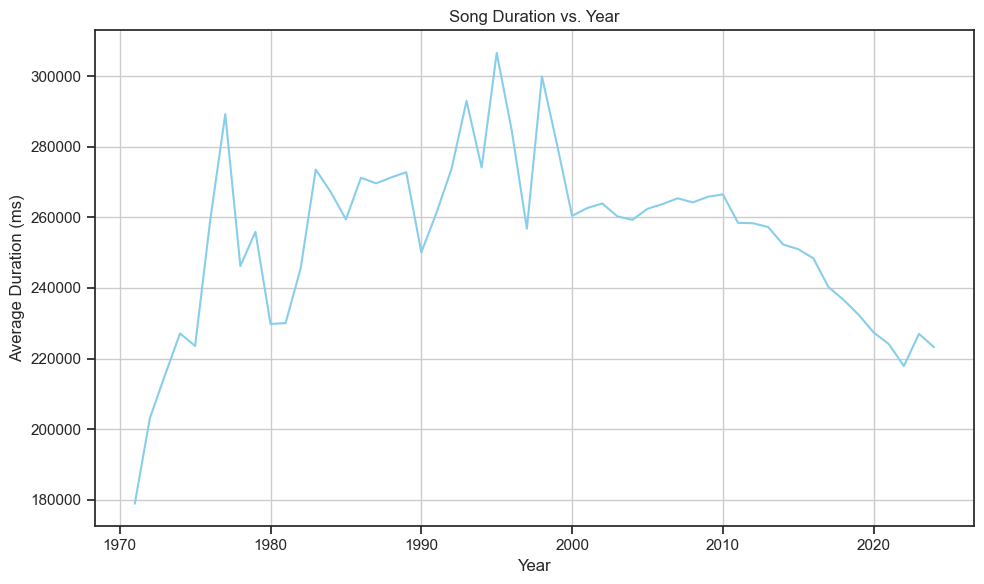

In [50]:
# Select the columns for year and duration_ms
year_column = 'year'
duration_column = 'duration_ms'

def visualize_duration_vs_year():
    # Group the data by year and calculate the average duration for each year
    year_duration = df.groupby(year_column)[duration_column].mean()
    
    # Create a line chart to visualize the trend of song durations over the years
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=year_duration.index, y=year_duration.values, color='skyblue')
    
    plt.title('Song Duration vs. Year')
    plt.xlabel('Year')
    plt.ylabel('Average Duration (ms)')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_duration_vs_year()

### 7. Top 10 artists: With highest Average popularity tracks

Top 10 Artists with Highest Average Popularity:
                         artist_name  popularity
10523                Manjula Gururaj      71.278
13550                   Rajani Mehta      71.368
5653                            Feid      71.895
13645                 Rauw Alejandro      71.923
1248   Arun Ingle Shubhalaxmi Chorus      72.059
9066       Kishore Kumar Asha Bhosle      72.375
6690   Gulshan Komal Surinder Shinda      72.611
14266          S. Janaki K J Yesudas      72.706
18919                   apna sangeet      75.056
6881                    Harry Styles      75.686


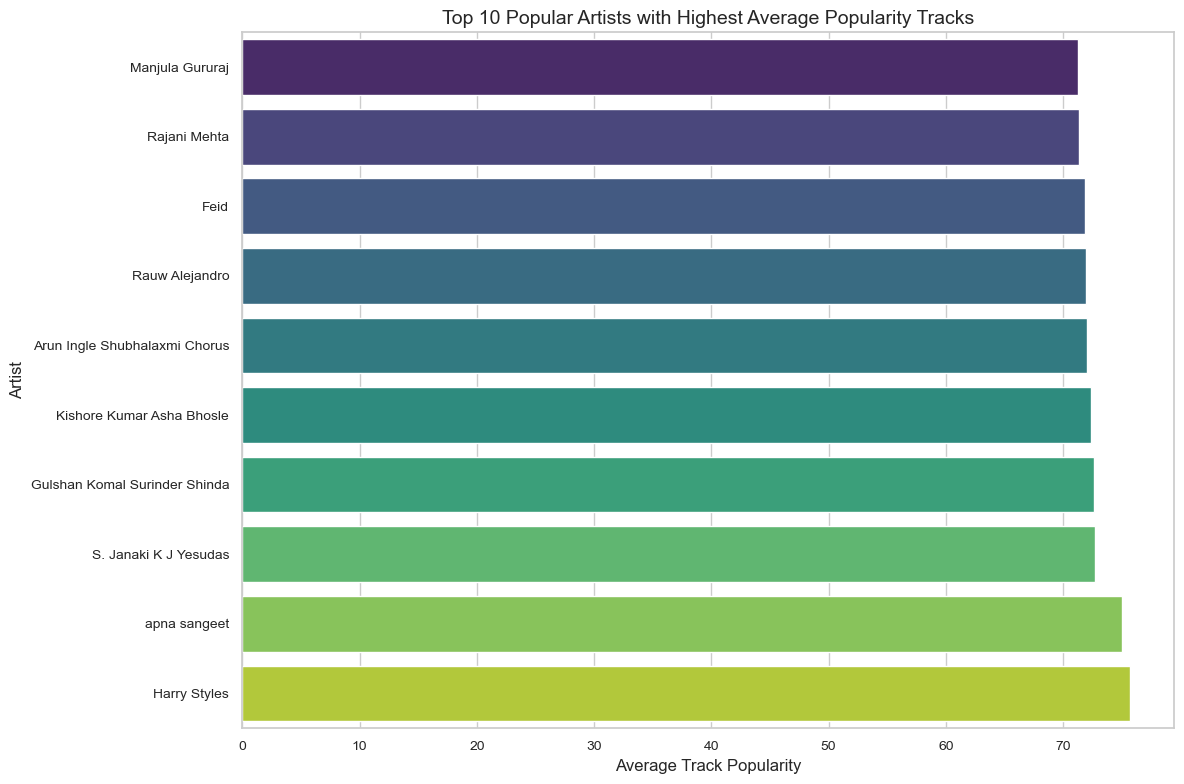

In [51]:
# Calculate the mean number of songs per artist
mean_number_of_songs = df['artist_name'].value_counts(ascending=False).mean()

# Filter artists with a number of songs greater than or equal to the mean
top_artists = df[df['artist_name'].map(df['artist_name'].value_counts()) >= int(mean_number_of_songs)]
top_artists = top_artists[['artist_name', 'track_name', 'popularity']]

# Calculate the average popularity of tracks for each artist
top_artists_average_popularity = top_artists.groupby('artist_name')['popularity'].mean().reset_index()

# Sort the artists by average popularity in ascending order
top_artists_average_popularity_sorted = top_artists_average_popularity.sort_values(by="popularity", ascending=True)

# Select the top 10 artists with the highest average popularity
top_10_artists_average_popularity = top_artists_average_popularity_sorted[-10:]
print("Top 10 Artists with Highest Average Popularity:")
print(top_10_artists_average_popularity)

# Plot the top 10 artists with the highest average popularity
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='popularity', y='artist_name', data=top_10_artists_average_popularity, palette='viridis')

plt.title('Top 10 Popular Artists with Highest Average Popularity Tracks', fontsize=14)
plt.xlabel('Average Track Popularity', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 8. Popularity vs. Song Features

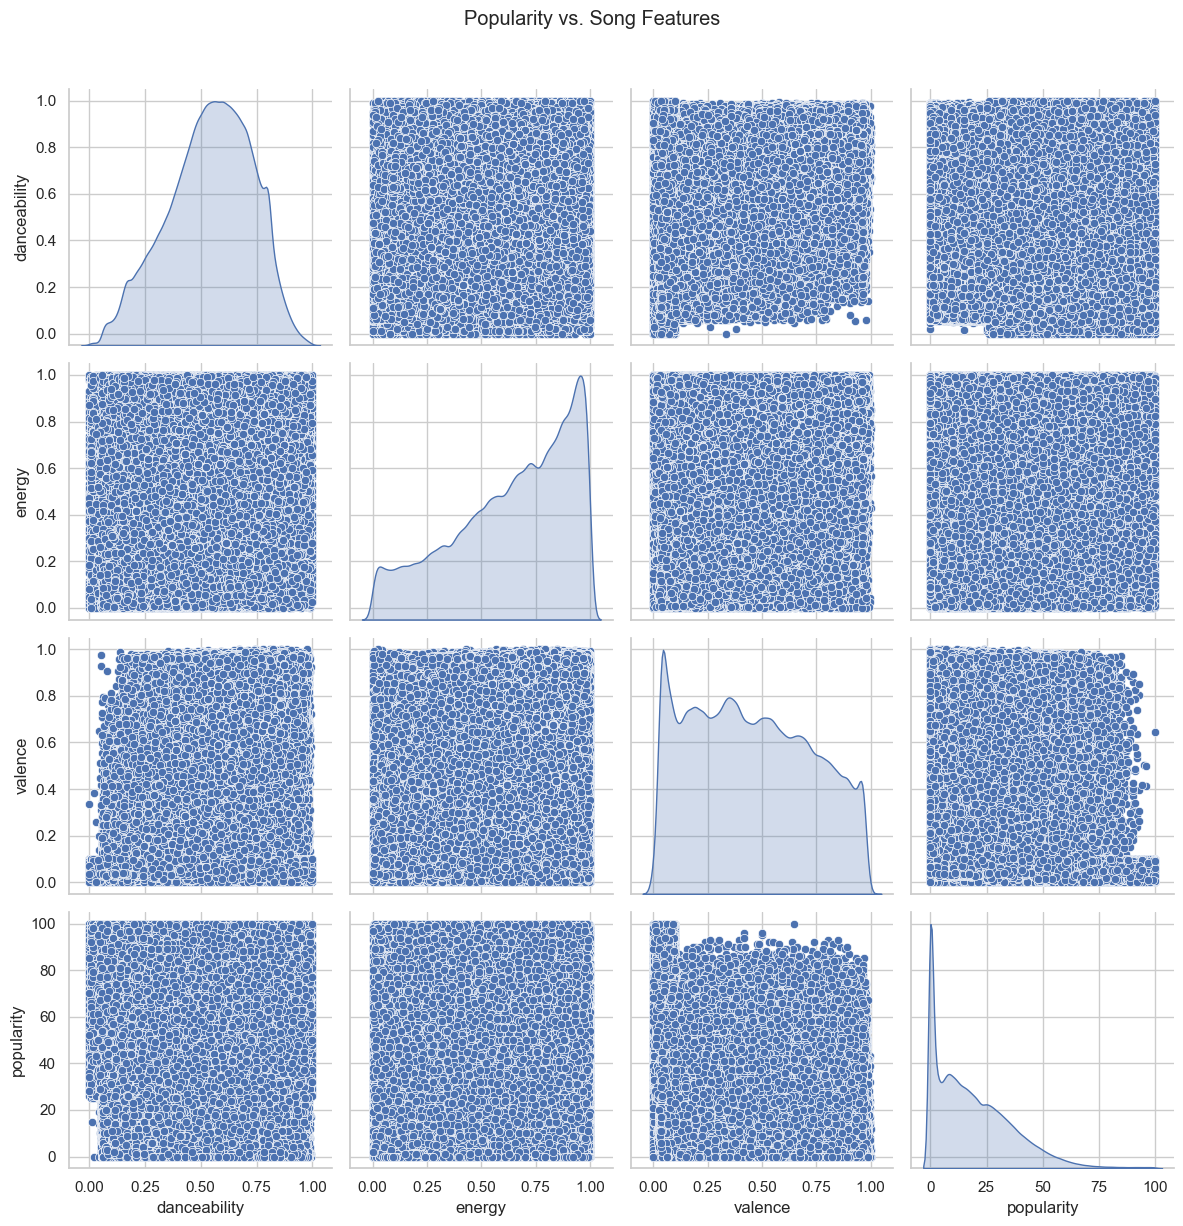

In [52]:
# Select the features and popularity column
features = ['danceability', 'energy', 'valence']
popularity_column = 'popularity'

def visualize_popularity_vs_features():
    # Set the style and context for the plot
    sns.set(style="whitegrid", context='notebook')
    
    # Create a pairplot to visualize pairwise relationships between features and popularity
    g = sns.pairplot(df, vars=features + [popularity_column], kind='scatter', diag_kind='kde', height=3)
    
    # Set the figure background to white
    g.fig.set_facecolor('white')

    plt.suptitle('Popularity vs. Song Features', y=1.02)
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_popularity_vs_features()

### 9. Top 10 Genres: With highest Average popularity tracks

Top 10 Genres with Highest Average Popularity:
                 genre  popularity
32           bhojiwood      62.132
134             ghazal      62.508
261            qawwali      62.526
25          bangla pop      62.626
49            champeta      64.833
57           christian      65.625
317  traditional music      66.000
155       haryanvi pop      70.000
174           indorock      71.000
273         rocksteady      81.667


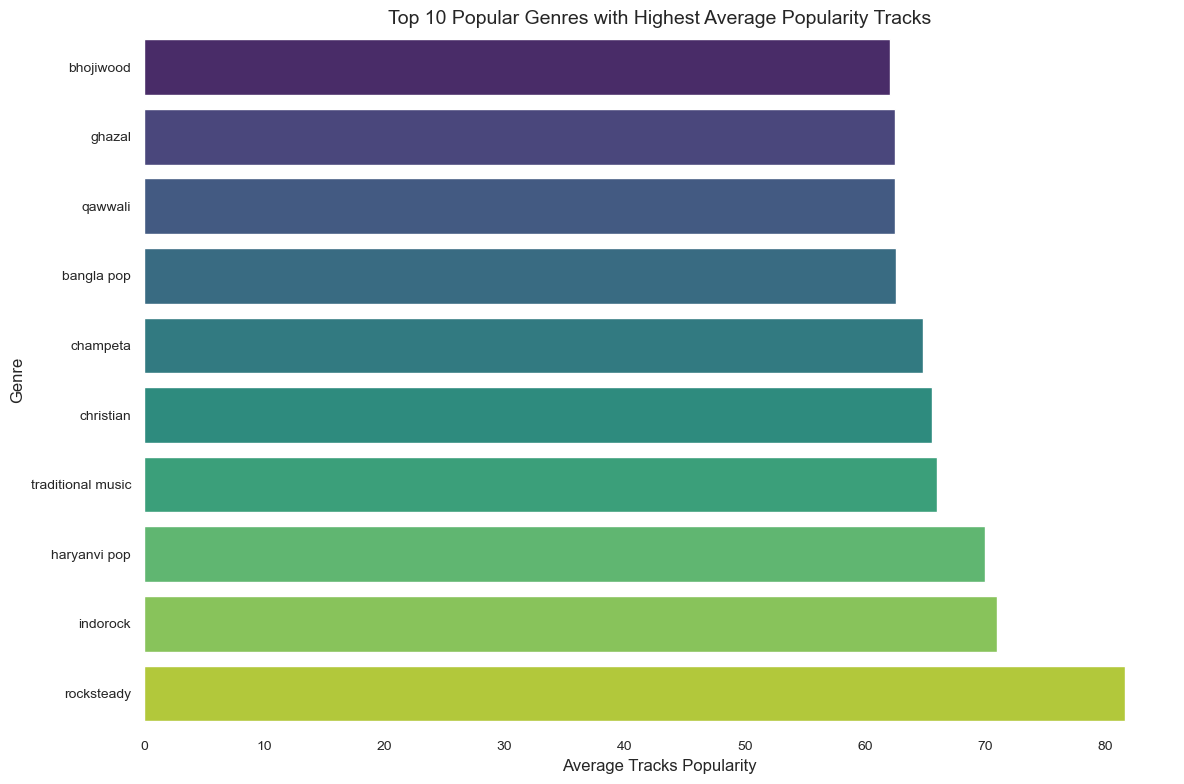

In [53]:
# Calculate the average popularity for each genre
top10_genres = df[['genre', 'track_name', 'popularity']]
top10_genres_average_popularity = top10_genres.groupby('genre')['popularity'].mean().reset_index()

# Sort the genres by average popularity in ascending order
top10_genres_average_popularity_sorted = top10_genres_average_popularity.sort_values(by="popularity", ascending=True)

# Select the top 10 genres with the highest average popularity
top_10_genres_average_popularity = top10_genres_average_popularity_sorted[-10:]
print("Top 10 Genres with Highest Average Popularity:")
print(top_10_genres_average_popularity)

# Plot the top 10 genres with the highest average popularity
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})  # Set the facecolor for axes and figure
sns.barplot(x='popularity', y='genre', data=top_10_genres_average_popularity, palette='viridis')

plt.title('Top 10 Popular Genres with Highest Average Popularity Tracks', fontsize=14)
plt.xlabel('Average Tracks Popularity', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### 10. Genre Distribution over the year

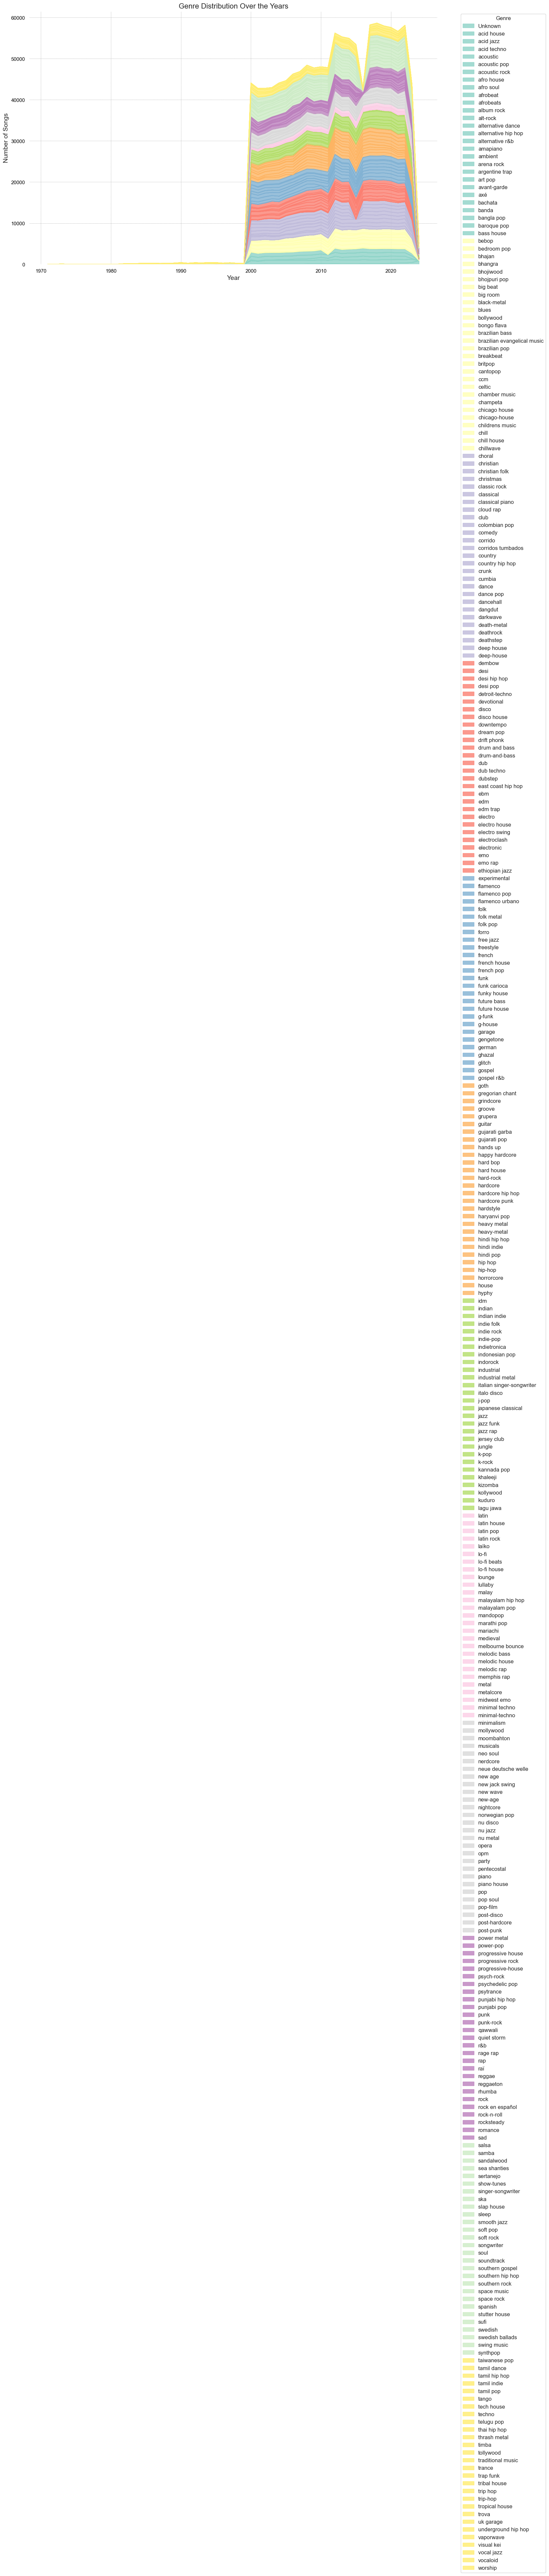

In [54]:
# Convert the 'year' column to datetime if it's not already
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

def genre_analysis_and_trends():
    # Clear previous plots
    plt.clf()
    plt.close()

    # Group the data by 'year' and 'genre' and count the number of songs
    genre_counts = df.groupby(['year', 'genre']).size().unstack(fill_value=0)

    # Create a stacked area chart to visualize genre distribution over the years
    fig, ax = plt.subplots(figsize=(16, 10), facecolor='white')  # Ensure the figure has the correct background
    genre_counts.plot(kind='area', stacked=True, colormap='Set3', alpha=0.8, ax=ax)
    
    ax.set_title('Genre Distribution Over the Years', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Number of Songs', fontsize=14)
    ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Set axis facecolor
    ax.set_facecolor('white')
    ax.tick_params(colors='black', which='both')  # Change tick colors to black

    # Set the legend background color
    legend = ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    legend.get_frame().set_facecolor('white')  # Set the background color of the legend box

    plt.tight_layout()
    plt.show()

# Example usage:
genre_analysis_and_trends()

### 11. Loudness of tracks evolved over years

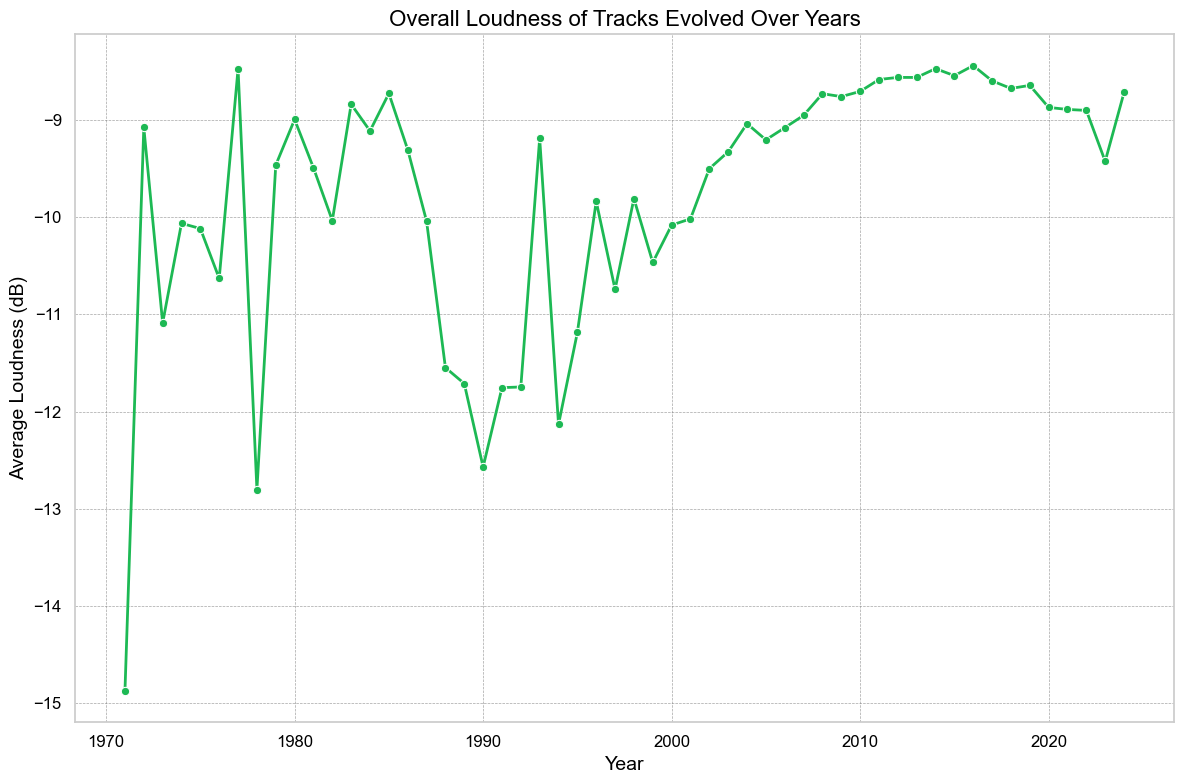

In [55]:
# Calculate the average loudness for each year
loudness_over_year = df[['year', 'track_name', 'loudness']]
loudness_over_year_avg = loudness_over_year.groupby('year')['loudness'].mean().reset_index()

# Set the style and figure size for the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Dark background

# Create the line plot for loudness over the years
sns.lineplot(x='year', y='loudness', data=loudness_over_year_avg, color="#1DB954", marker='o', linewidth=2)

# Customize plot aesthetics
plt.title('Overall Loudness of Tracks Evolved Over Years', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Average Loudness (dB)', fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)  # Light grid for better readability
plt.tight_layout()
plt.show()

### 12. Danceability of tracks evolved over years

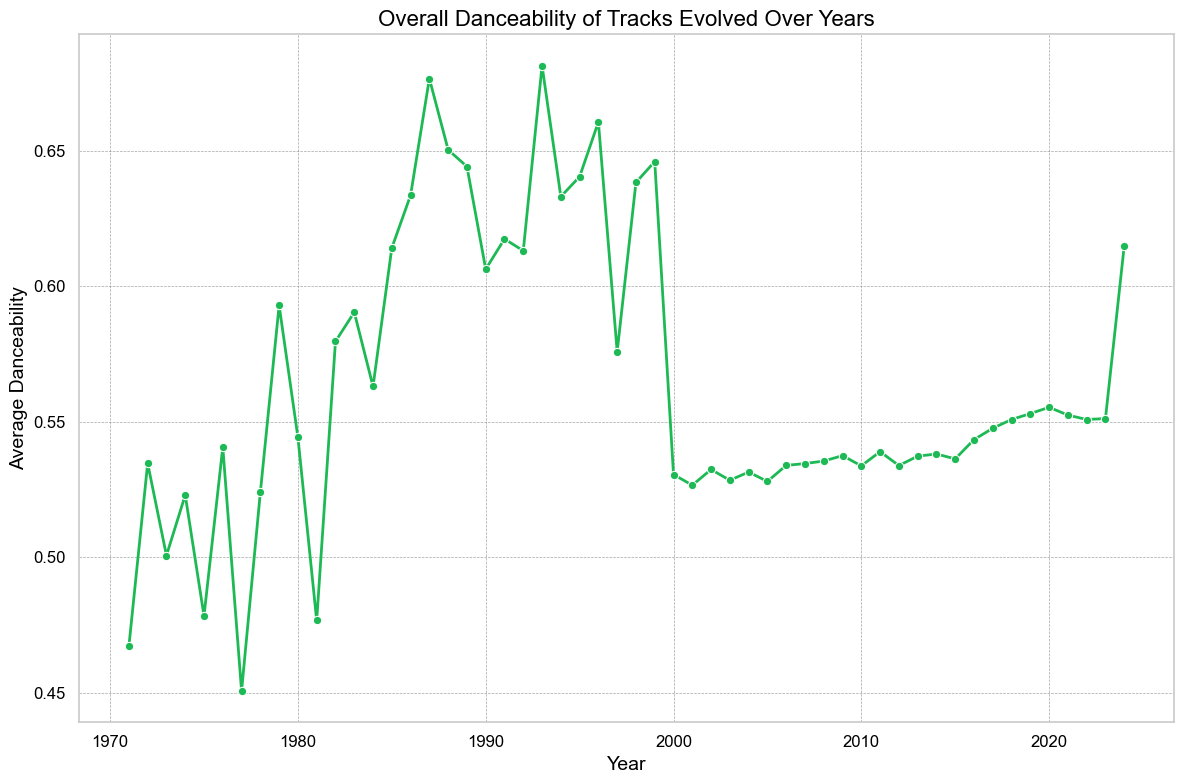

In [56]:
# Calculate the average danceability for each year
danceability_over_years = df[['year', 'track_name', 'danceability']]
danceability_over_years_avg = danceability_over_years.groupby('year')['danceability'].mean().reset_index()

# Set the style and figure size for the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the line plot for danceability over the years
sns.lineplot(x='year', y='danceability', data=danceability_over_years_avg, color="#1DB954", marker='o', linewidth=2)

# Customize plot aesthetics
plt.title('Overall Danceability of Tracks Evolved Over Years', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Average Danceability', fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)  # Light grid for better readability
plt.tight_layout()
plt.show()

### 13. Show the relation between the track duration and the track popularity score

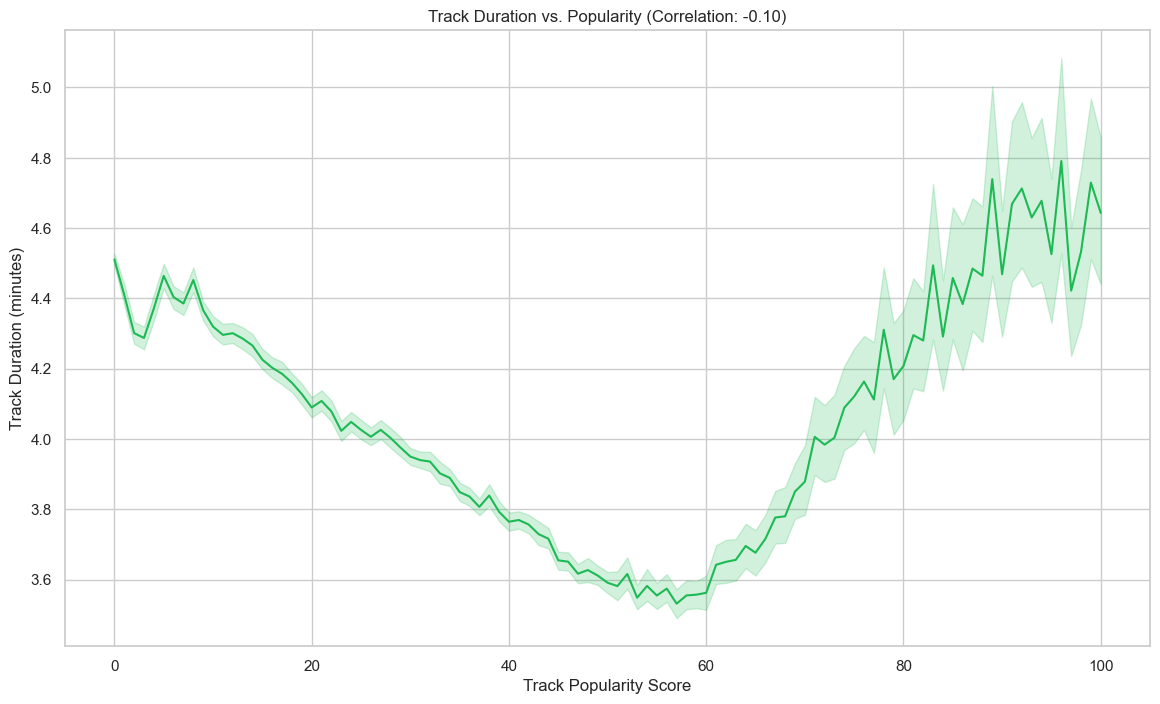

In [57]:
duration_vs_popularity = df[['track_name','duration_ms','popularity']]
duration_vs_popularity['duration_minutes'] = duration_vs_popularity['duration_ms'] / 60000

correlation = duration_vs_popularity['duration_minutes'].corr(duration_vs_popularity['popularity'])


plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.lineplot(x='popularity', y='duration_minutes', data=duration_vs_popularity, color="#1DB954")
plt.title(f'Track Duration vs. Popularity (Correlation: {correlation:.2f})')
plt.xlabel('Track Popularity Score')
plt.ylabel('Track Duration (minutes)')
plt.show()

### 14. Top tracks in each genre

In [58]:
def get_top_per_genre(genre_name, num_of_tracks):
    # Filter the dataset for the selected genre
    top_tracks_in_each_genre = df[df['genre'] == genre_name]
    top_tracks_in_each_genre = top_tracks_in_each_genre[['track_name', 'popularity', 'artist_name']]
    top_tracks_in_each_genre = top_tracks_in_each_genre.sort_values(by="popularity", ascending=True)
    top10_tracks_in_each_genre = top_tracks_in_each_genre[-num_of_tracks:]
    
    # Set seaborn style and figure properties for a clean background
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.set(style="ticks", rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.barplot(x='popularity', y='track_name', data=top10_tracks_in_each_genre, palette="viridis")
    
    plt.title(f'Top {num_of_tracks} Tracks in {genre_name}')
    plt.xlabel('Popularity Score')
    plt.ylabel('Track')
    
    plt.show()

# Interactive widget
widget = interactive(get_top_per_genre, 
                     genre_name=widgets.Dropdown(options=df['genre'].unique(), description="Genre"),
                     num_of_tracks=widgets.IntSlider(min=1, max=50, value=10, description="Tracks"))

# Display widget
display(widget)



interactive(children=(Dropdown(description='Genre', options=('soft rock', 'soundtrack', 'psychedelic pop', 'cl…

### 15. Top tracks for top 10 artists

In [59]:
mean_number_of_songs = df['artist_name'].value_counts(ascending=False).mean()
top10_artists = df[df['artist_name'].map(df['artist_name'].value_counts()) >= int(mean_number_of_songs)]
top10_artists = top10_artists[['artist_name','track_name','popularity']]
top10_artists_average_popularity = top10_artists.groupby('artist_name')['popularity'].mean().reset_index()
top10_artists_average_popularity_sorted = top10_artists_average_popularity.sort_values(by = "popularity",ascending=True)
top10_artists_average_popularity_sorted = top10_artists_average_popularity_sorted[-10:]

def get_top_per_artist(artist_name,number_of_tracks):
    top_tracks_for_each_artist = df[df['artist_name'] == artist_name]
    top_tracks_for_each_artist = top_tracks_for_each_artist[['track_name','popularity']]
    top_tracks_for_each_artist = top_tracks_for_each_artist.sort_values(by="popularity", ascending=True)
    top10_tracks_for_each_artist = top_tracks_for_each_artist[-number_of_tracks:]
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.set(style="ticks", rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.barplot(x='popularity', y='track_name', data=top10_tracks_for_each_artist, palette="viridis")
    plt.title(f'Top {number_of_tracks} Tracks for {artist_name}')
    plt.xlabel('Popularity Score')
    plt.ylabel('Track')

    plt.show()

interactive(get_top_per_artist, artist_name=list(top10_artists_average_popularity_sorted.artist_name.unique()), number_of_tracks=(1,50))

interactive(children=(Dropdown(description='artist_name', options=('Manjula Gururaj', 'Rajani Mehta', 'Feid', …

### 16. Cluster Analysis (K-means)

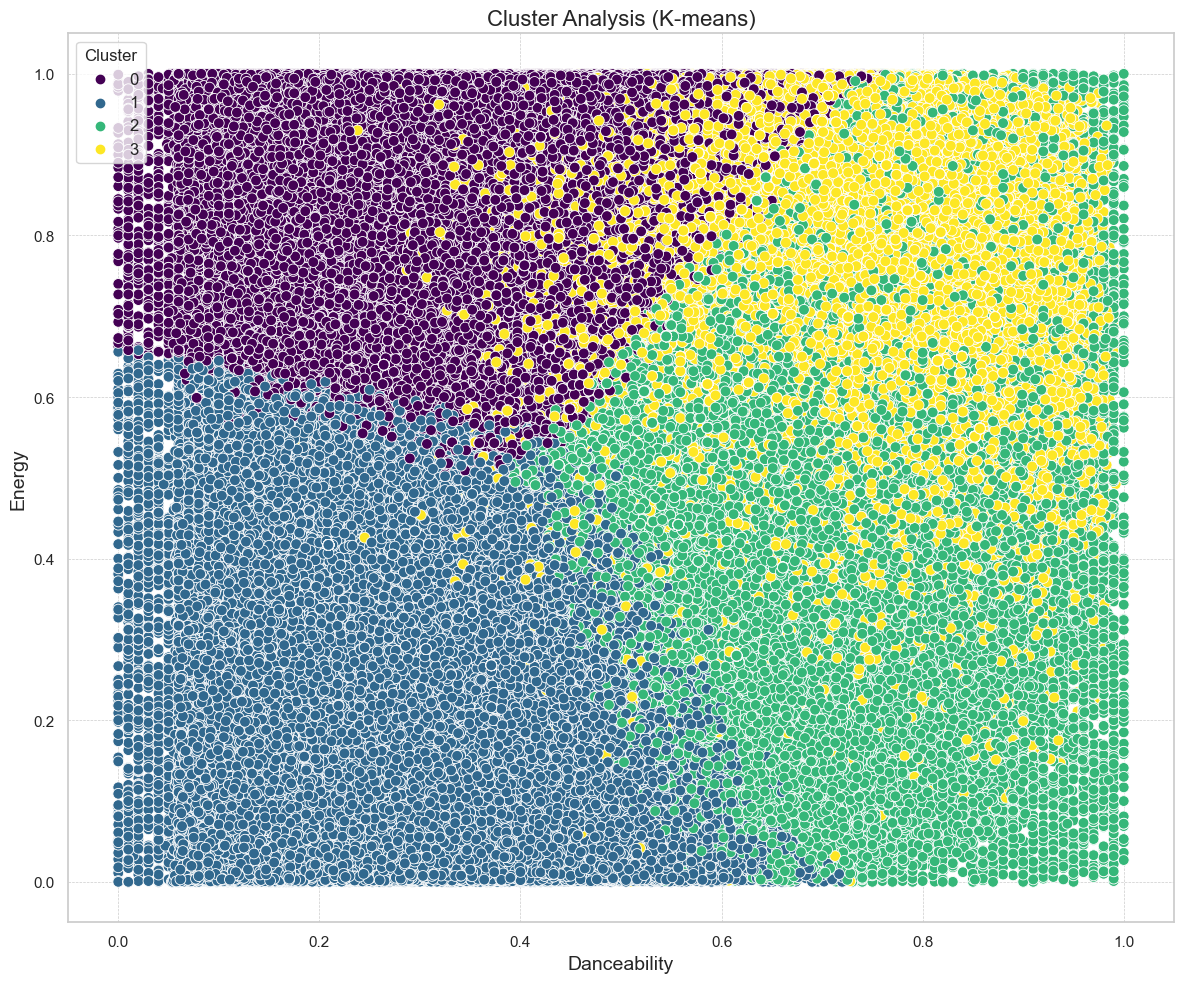

In [60]:
features = ['danceability', 'energy', 'valence']
def perform_cluster_analysis(num_clusters):
    # Select the specified features from the dataset
    data = df[features]
    
    # Standardize the features (important for K-means)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(data_scaled)

    # Create scatter plots to visualize the clusters
    plt.figure(figsize=(12, 10))
    sns.set(style="whitegrid")
    plt.gcf().set_facecolor('white')
    sns.scatterplot(data=df, x=features[0], y=features[1], hue='cluster', palette='viridis', s=60)
    
    plt.title('Cluster Analysis (K-means)', fontsize=16)
    plt.xlabel(features[0].capitalize(), fontsize=14)
    plt.ylabel(features[1].capitalize(), fontsize=14)
    plt.legend(title='Cluster', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Set the desired number of clusters (e.g., 4)
perform_cluster_analysis(4)

### 17. Artist popularity 

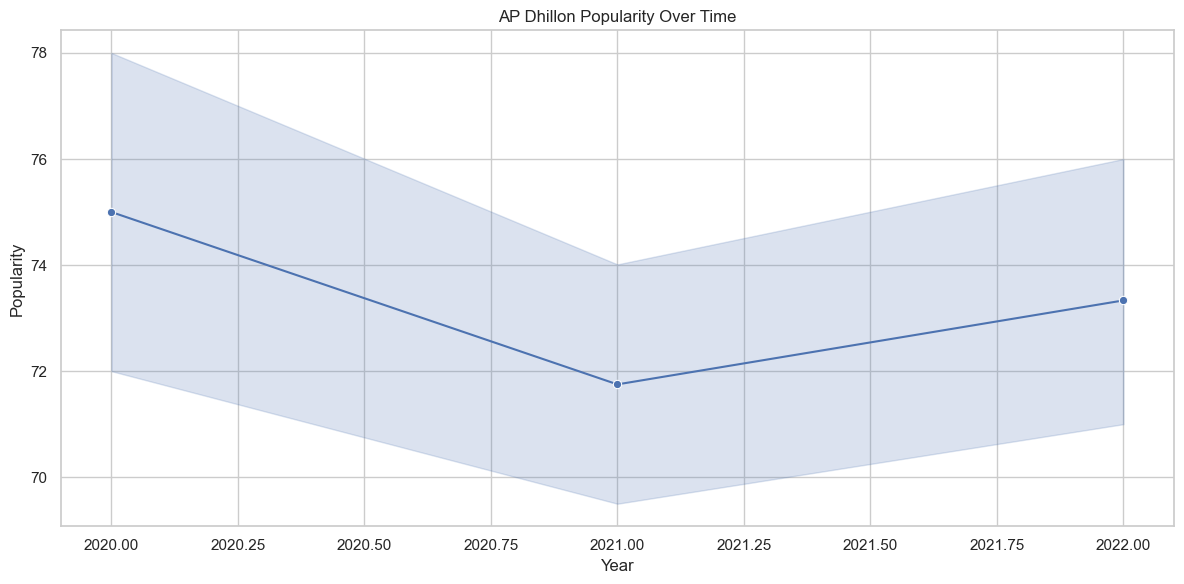

AP Dhillon's Discography:
- Brown Munde
- Excuses
- Insane
- TERE TE
- DESIRES
- SPACESHIP
- Wo Noor
- Dil Nu
- Summer High

AP Dhillon's Genre Evolution:
genre
hip-hop    9
Name: count, dtype: int64


In [61]:
# Select the columns for artist, popularity, and release year
artist_column = 'artist_name'
popularity_column = 'popularity'
year_column = 'year'

# Specify the artist you want to analyze
artist_to_analyze = 'ArtistName'

def artist_insights(artist_name):
    # Filter the dataset for the selected artist
    artist_data = df[df[artist_column] == artist_name]

    # Create a line chart to visualize the artist's popularity over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=artist_data[year_column], y=artist_data[popularity_column], marker='o', linestyle='-')
    
    plt.title(f'{artist_name} Popularity Over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display the artist's discography
    discography = artist_data['track_name'].unique()
    print(f"{artist_name}'s Discography:")
    for track in discography:
        print(f"- {track}")

    # Analyze genre evolution (if genre information is available)
    if 'genre' in df.columns:
        genre_data = artist_data['genre'].value_counts()
        print(f"\n{artist_name}'s Genre Evolution:")
        print(genre_data)

user_artist = 'AP Dhillon'
artist_insights(user_artist)

### 18. Speechiness vs. Instrumentalness

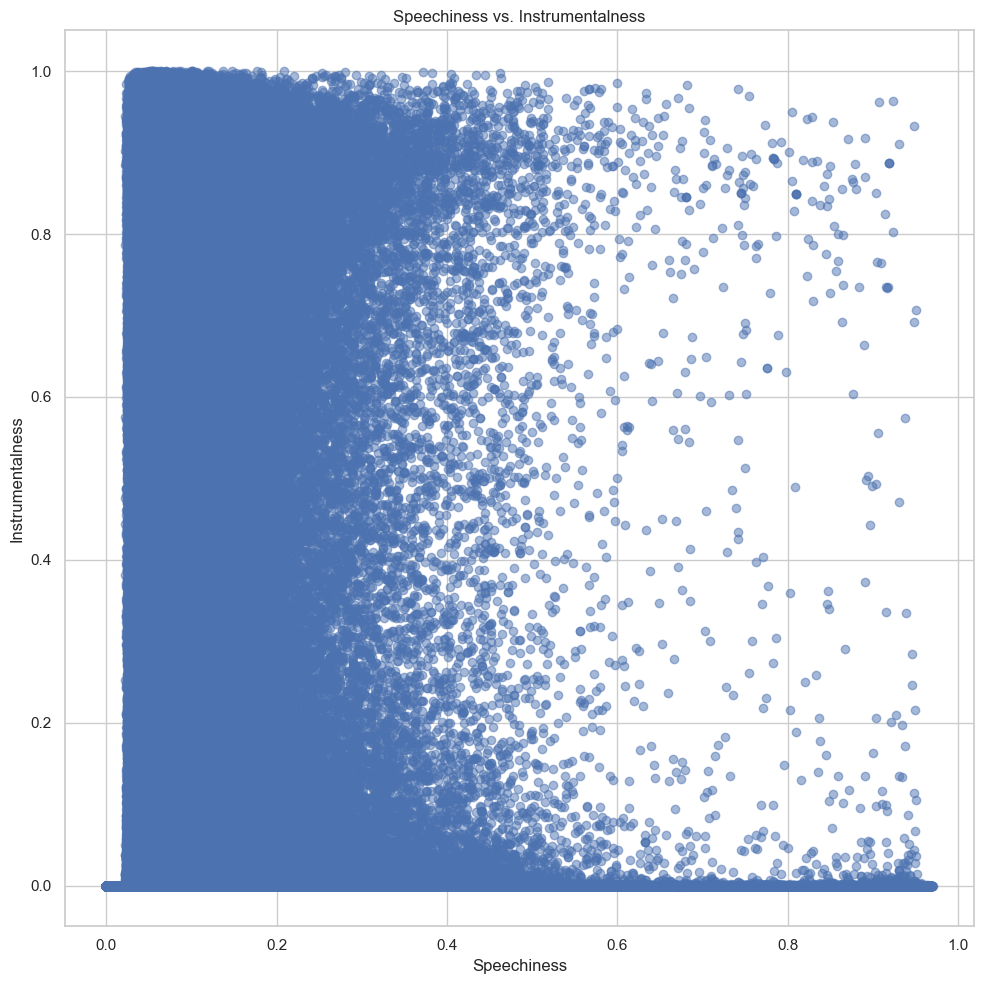

In [62]:
# Select the columns for speechiness and instrumentalness
speechiness_column = 'speechiness'
instrumentalness_column = 'instrumentalness'

def visualize_speechiness_vs_instrumentalness():
    # Create a scatter plot to analyze the trade-off between speechiness and instrumentalness
    plt.figure(figsize=(10, 10))
    plt.scatter(df[speechiness_column], df[instrumentalness_column], alpha=0.5)
    
    plt.title('Speechiness vs. Instrumentalness')
    plt.xlabel('Speechiness')
    plt.ylabel('Instrumentalness')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_speechiness_vs_instrumentalness()

### 19. Energy Vs Loudness

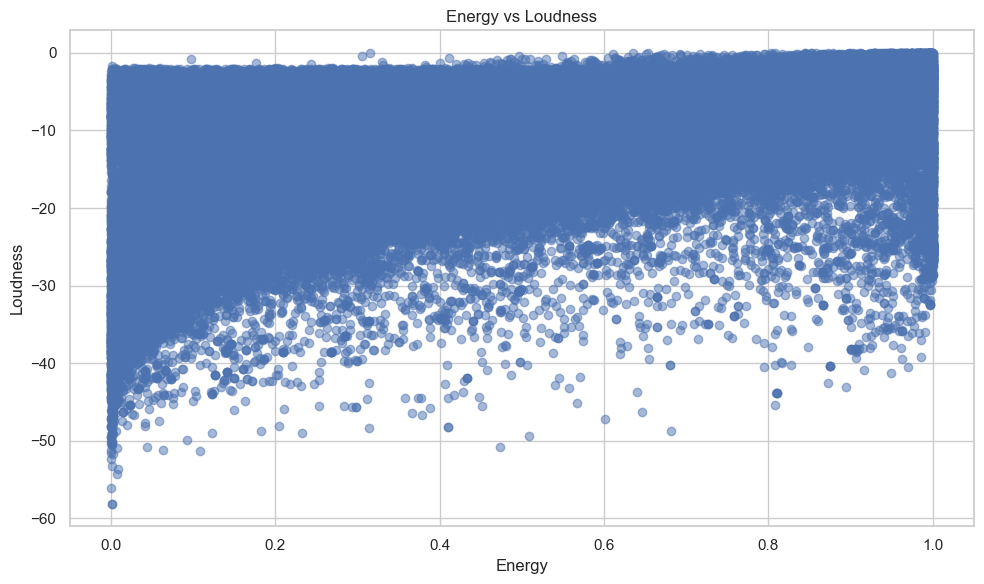

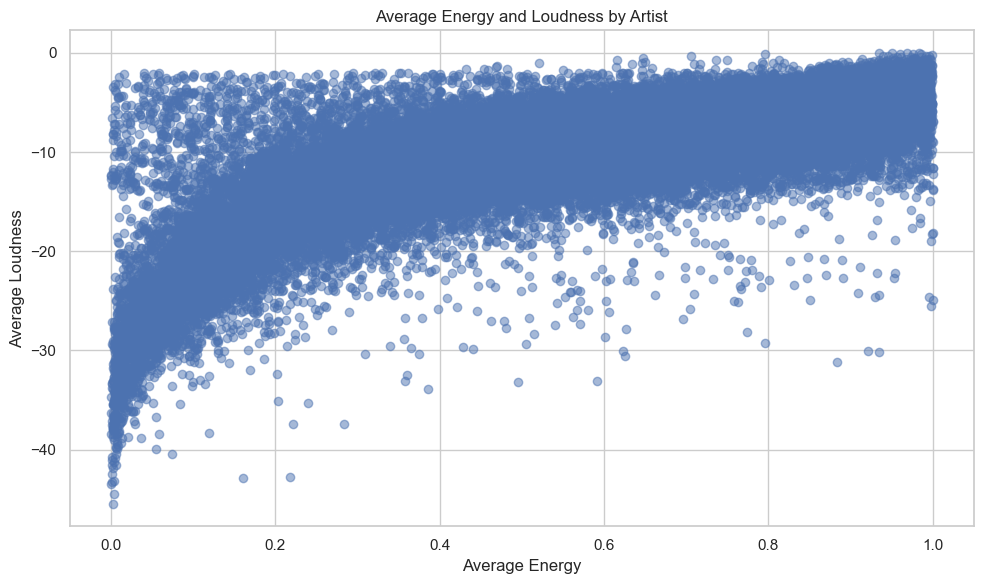

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['energy'], df['loudness'], alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs Loudness')
plt.tight_layout()
plt.show()

# Scatter plot: Average Energy and Loudness for each artist
avg_energy_loudness = df.groupby('artist_name')[['energy', 'loudness']].mean()

plt.figure(figsize=(10, 6))
plt.scatter(avg_energy_loudness['energy'], avg_energy_loudness['loudness'], alpha=0.5)
plt.xlabel('Average Energy')
plt.ylabel('Average Loudness')
plt.title('Average Energy and Loudness by Artist')
plt.tight_layout()
plt.show()

### 20. Audio Features Histogram

In [64]:
# Initialize the list with the 'genre' column
f64_col = ['genre']

# Iterate through the columns of the dataframe 'df'
for col in df.columns:
    # Check if the column data type is 'float64'
    if df[col].dtype == 'float64':
        f64_col.append(col)

# Select the columns from the dataframe
data = df[f64_col]

In [65]:
# Calculate the value counts for 'genre'
tmp = df['genre'].value_counts()

# Convert to DataFrame and rename the column
tmp = pd.DataFrame(tmp).reset_index()
tmp.columns = ['genre', 'count']

# Calculate the percentage
tmp['percentage'] = (tmp['count'] / tmp['count'].sum()) * 100

# Format the percentage
tmp['percentage'] = tmp['percentage'].apply(lambda x: f'{x:.2f}%')

# Display the top 20 genres
display(tmp.head(20))

# Get the list of top 20 genres
top20_genre = tmp.head(20)['genre'].tolist()

genre  count percentage
0         k-pop  24718      2.04%
1   black-metal  21482      1.77%
2        gospel  21426      1.77%
3      acoustic  20869      1.72%
4      alt-rock  20831      1.72%
5           emo  20721      1.71%
6       ambient  20595      1.70%
7        indian  20132      1.66%
8         blues  19535      1.61%
9       new-age  19472      1.61%
10        forro  19332      1.60%
11      spanish  19046      1.57%
12        chill  18744      1.55%
13    dancehall  18712      1.55%
14          dub  18533      1.53%
15        samba  18448      1.52%
16       comedy  18377      1.52%
17       french  18330      1.51%
18   deep-house  17878      1.48%
19      country  17844      1.47%

In [66]:
def make_hist(pal):
    # Filter the data to include only the top 20 genres
    data20 = data[data['genre'].isin(top20_genre)]
    
    # Create a dictionary to order the genres
    c_order = {x: i + 1 for i, x in enumerate(top20_genre)}
    
    # Define color palettes
    palette = sns.color_palette('Set3', n_colors=len(top20_genre))
    palette2 = sns.color_palette('hsv', n_colors=len(top20_genre))[::-1]
    
    # Combine the two palettes
    palette3 = [(palette[i][0] * 0.8 + palette2[i][0] * 0.2, 
                 palette[i][1] * 0.8 + palette2[i][1] * 0.2, 
                 palette[i][2] * 0.8 + palette2[i][2] * 0.2) 
                for i in range(len(top20_genre))]
    
    # Map the genre order to the data
    data20 = data20.assign(c_order=data20['genre'].map(c_order)).sort_values('c_order').drop('c_order', axis=1)
    
    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data20,
        x=pal,
        hue='genre',
        multiple='stack',
        binwidth=0.02 * (data20[pal].max() - data20[pal].min()),
        palette=palette3
    )
    
    # Add titles and labels
    plt.tight_layout()
    plt.title(f'{pal.capitalize()} Histogram in Top 20 Genres')
    plt.xlabel(pal.capitalize())
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()

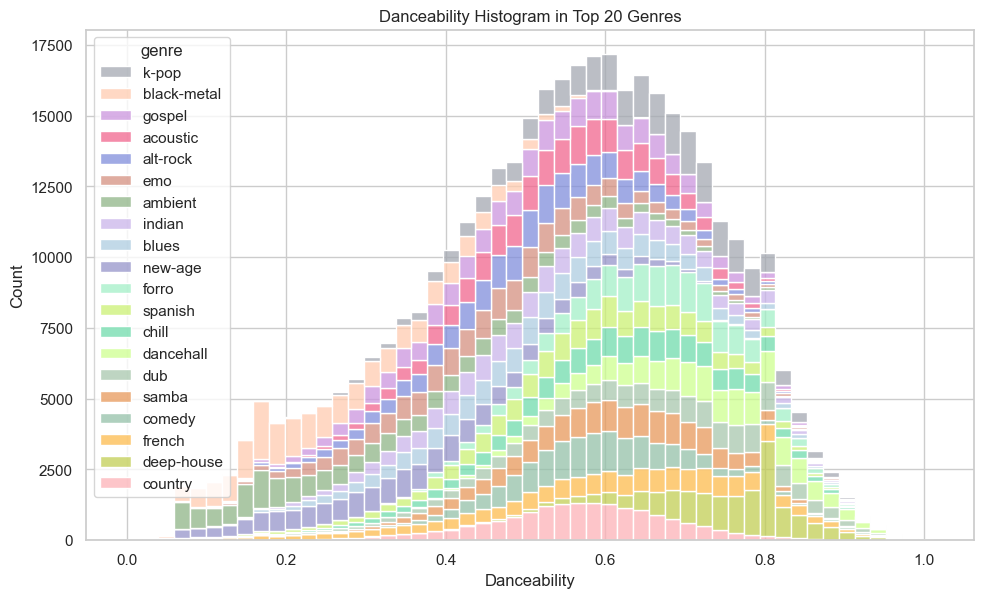

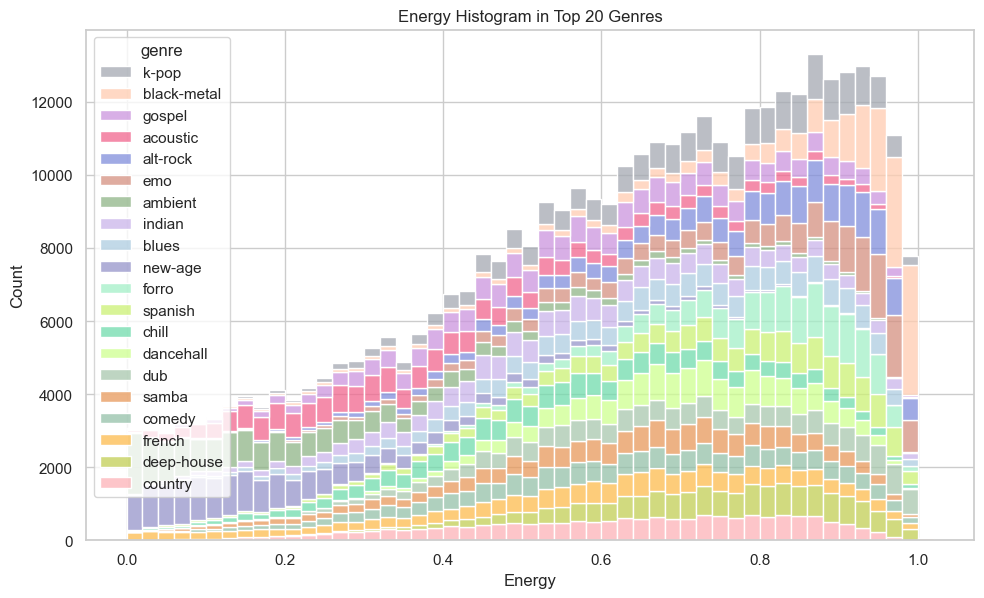

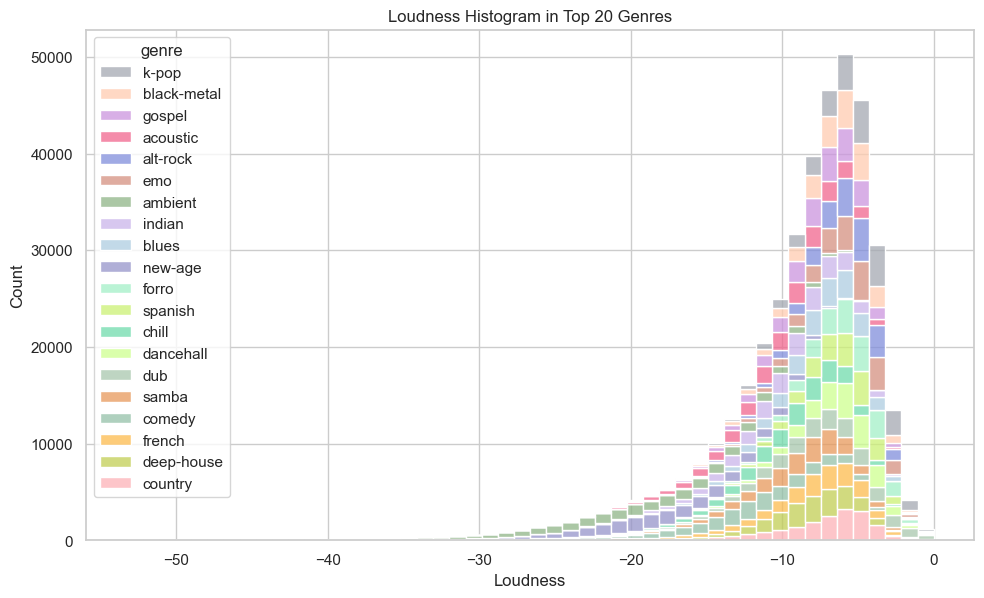

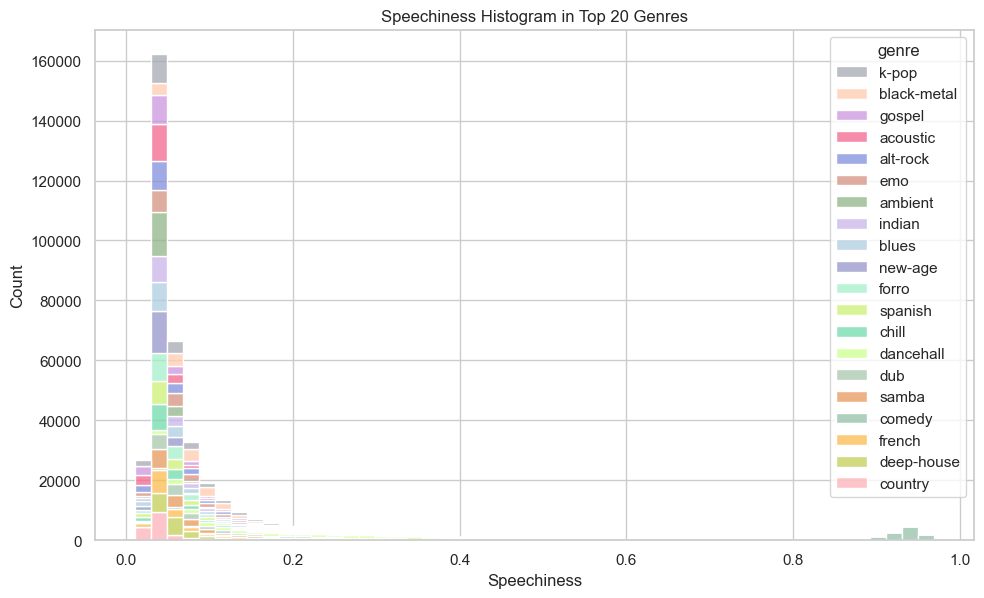

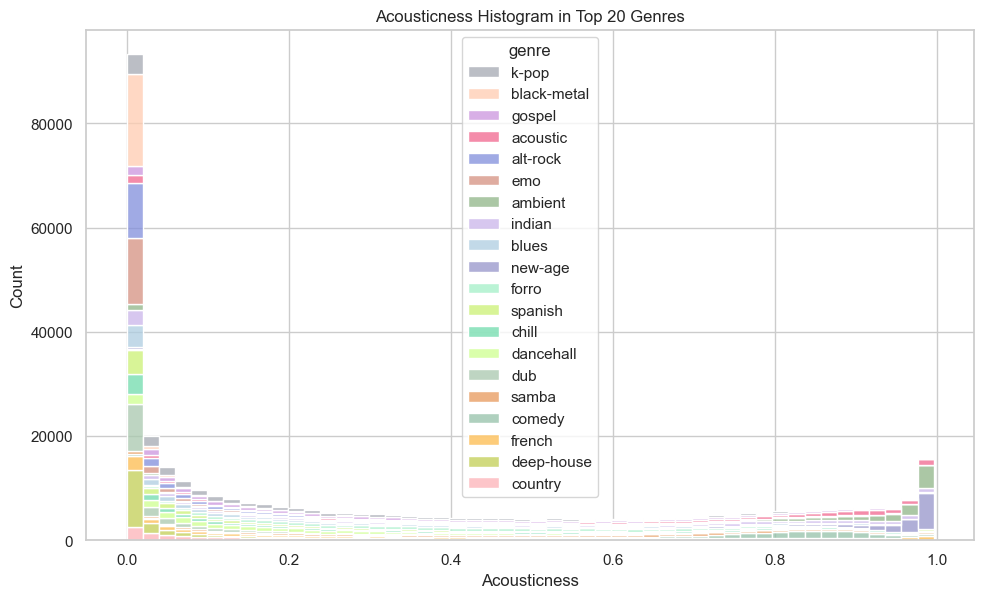

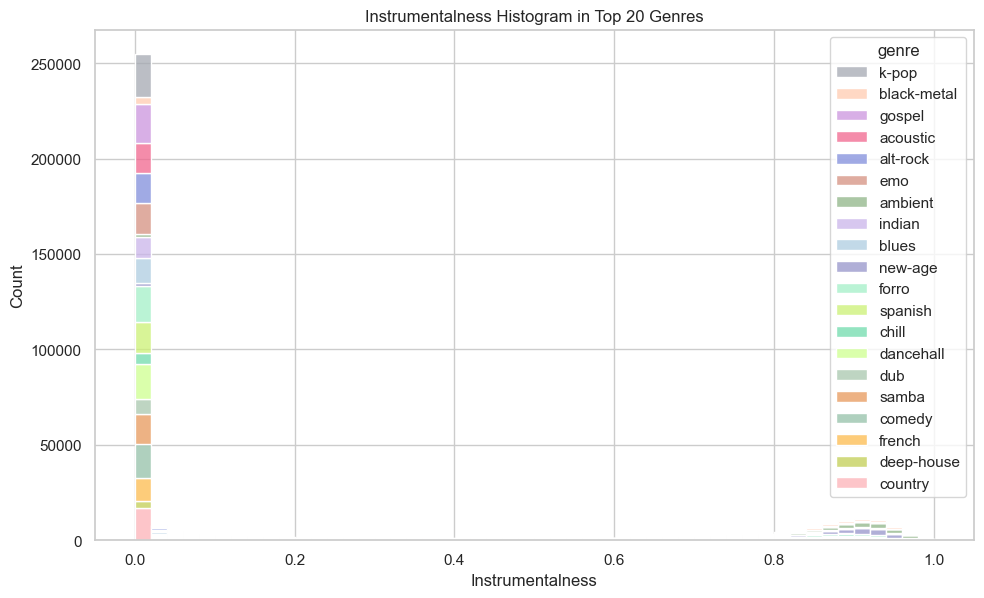

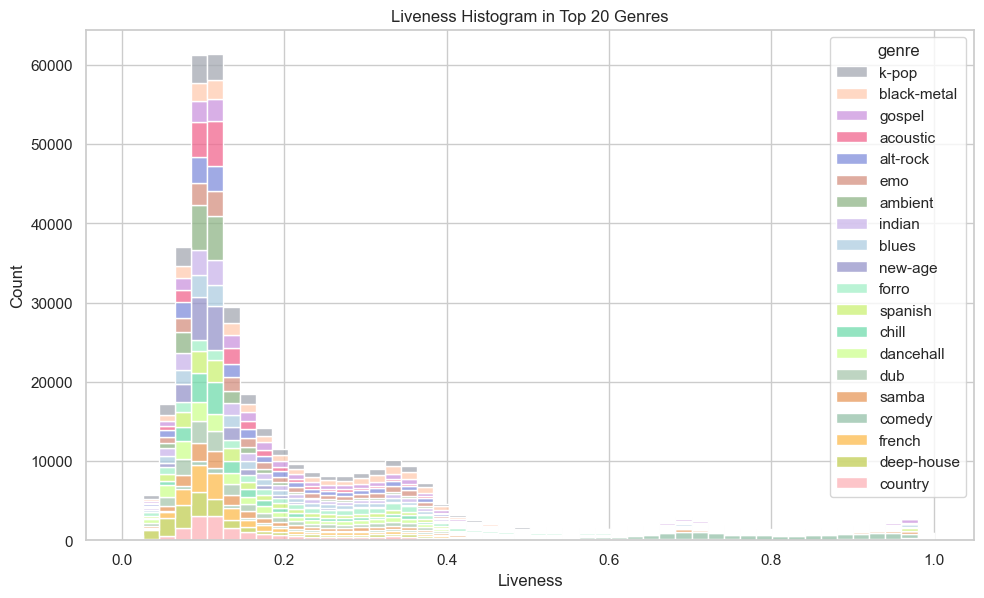

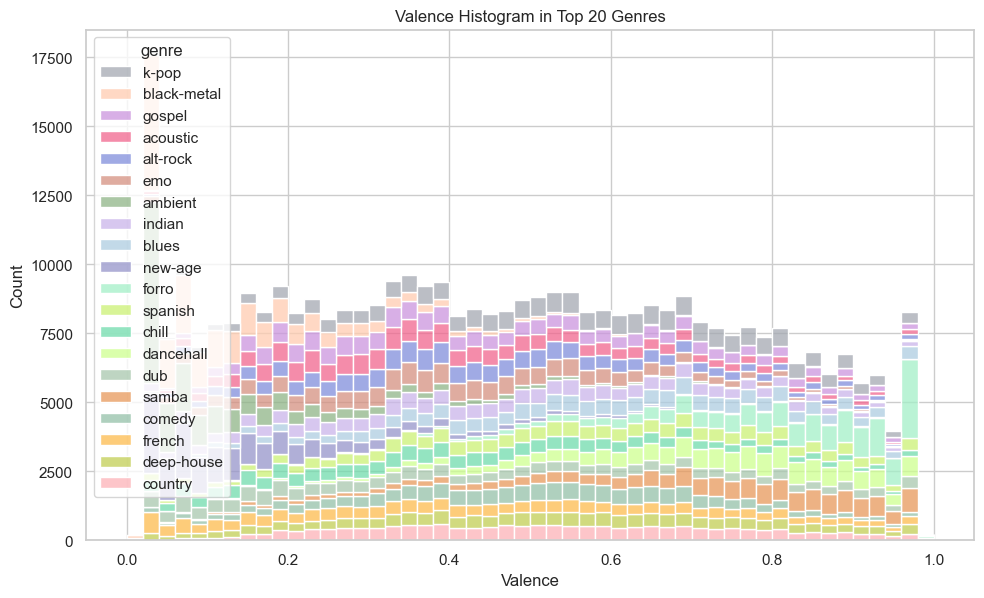

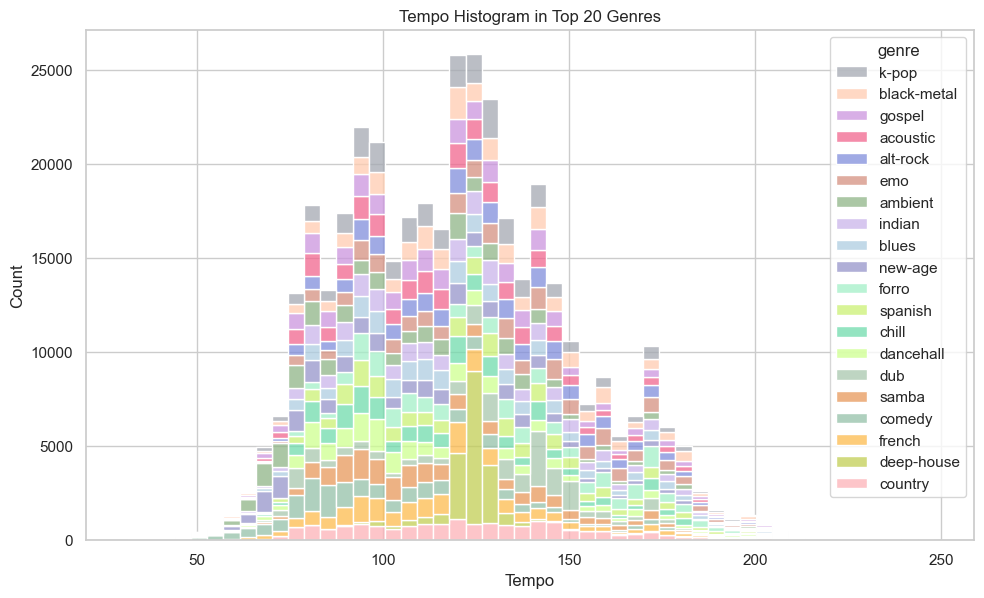

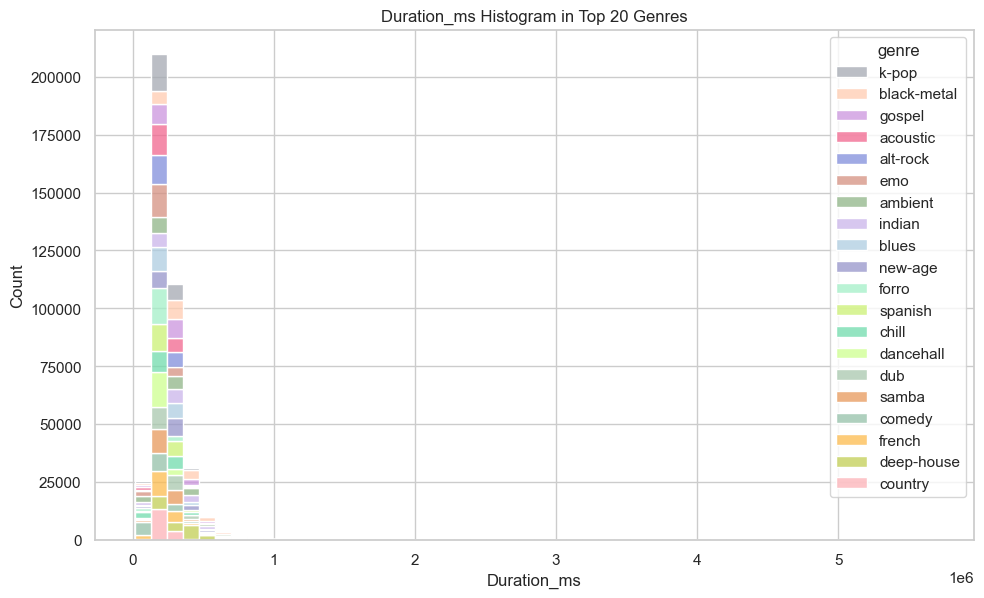

In [67]:
for pal in f64_col:
    if pal!='genre':
        make_hist(pal)

### 21. Languages vs release years

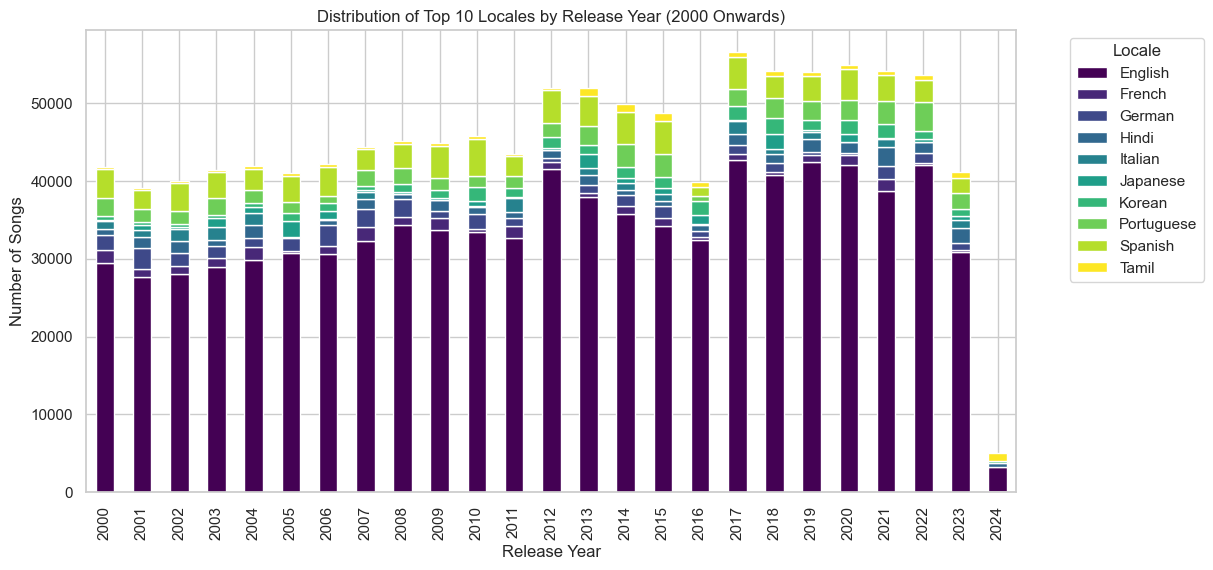

In [68]:
# Filter data for years 2000 onwards
df_filtered = df[df['year'] >= 2000]

# Get the top 10 locales with the highest song counts
top_locales = df_filtered['locale'].value_counts().nlargest(10).index

# Filter data for only the top 10 locales
df_filtered = df_filtered[df_filtered['locale'].isin(top_locales)]

# Group by year and locale, then count the number of songs
lang_year_df = df_filtered.groupby(['year', 'locale']).size().reset_index(name='count')

# Pivot to make years the x-axis and locales the categories
pivot_df = lang_year_df.pivot(index='year', columns='locale', values='count').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Distribution of Top 10 Locales by Release Year (2000 Onwards)')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.legend(title='Locale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 22. Top 10 Locale with highest unique tracks

In [69]:
# Group by locale and count unique tracks efficiently
track_count_per_locale = df.groupby('locale')['track_id'].nunique().reset_index(name='NumTracks')

# Find locale with highest & lowest number of unique tracks
highest_locale = track_count_per_locale.nlargest(1, 'NumTracks')['locale'].values[0]
lowest_locale = track_count_per_locale.nsmallest(1, 'NumTracks')['locale'].values[0]

# Display the number of tracks per locale
print("Number of Unique Tracks in Each Locale:")
print(track_count_per_locale.sort_values(by="NumTracks", ascending=False).head(10))  # Display top 10

# Identify the locale with the highest and lowest number of unique tracks
print(f"Locale with the highest unique tracks: {highest_locale}")
print(f"Locale with the lowest unique tracks: {lowest_locale}")

Number of Unique Tracks in Each Locale:
         locale  NumTracks
37      English     837735
139     Spanish      80045
118  Portuguese      49467
51       German      34071
61        Hindi      28178
84       Korean      28017
46       French      23173
72      Italian      17899
149       Tamil      16722
74     Japanese      16467
Locale with the highest unique tracks: English
Locale with the lowest unique tracks: Amazigh


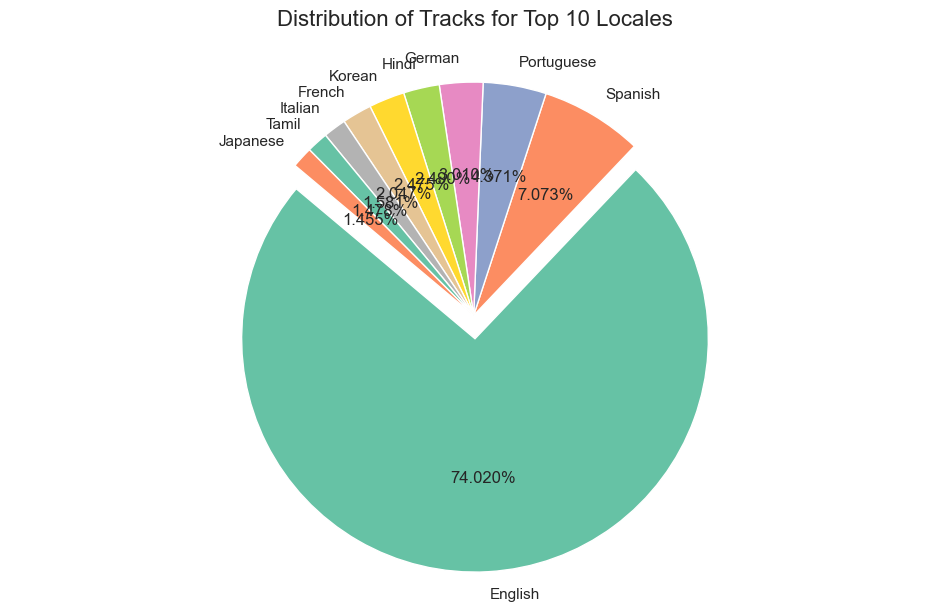

In [70]:
# Get top 10 locales with the highest number of tracks
top10_locales = track_count_per_locale.nlargest(10, 'NumTracks')

# Plot distribution of tracks for the top 10 locales
plt.figure(figsize=(12, 7))
colors = sns.color_palette("Set2", n_colors=10)  # Improved color palette
explode = [0.1 if locale == highest_locale else 0 for locale in top10_locales['locale']]  # Highlight top locale
plt.pie(top10_locales['NumTracks'], labels=top10_locales['locale'], autopct='%1.3f%%', explode=explode, colors=colors, startangle=140)
plt.title('Distribution of Tracks for Top 10 Locales\n', fontsize=16)
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()


### 23. Most popular artists/songs for top 10 locales.

In [75]:
artist_counts = df.groupby(['locale', 'artist_name']).size().reset_index(name='count')

top_artists_dict = {lang: group.nlargest(5, 'count')[['artist_name', 'count']].values.tolist() 
                    for lang, group in artist_counts.groupby('locale')}
# Step 1: Get the top 10 locales by unique track count
top_10_locales = df['locale'].value_counts().nlargest(10).index

for lang, artists in top_artists_dict.items():
    if lang in top_10_locales :
        print(f"\nTop 5 Artists for {lang}:")
        for artist, count in artists :
            print(f"{artist} - {count} songs")



Top 5 Artists for English:
Grateful Dead - 2270 songs
Traditional - 2168 songs
Johann Sebastian Bach - 1261 songs
Ramin Djawadi - 1144 songs
Alan Silvestri - 1130 songs

Top 5 Artists for French:
Alexandre Desplat - 329 songs
Forró do Muido - 201 songs
Brasas do Forró - 154 songs
Noda de Caju - 141 songs
Booba - 117 songs

Top 5 Artists for German:
Giacomo Meyerbeer - 595 songs
Johann Sebastian Bach - 443 songs
Richard Wagner - 322 songs
Giuseppe Verdi - 235 songs
Reinhard Keiser - 228 songs

Top 5 Artists for Hindi:
Arijit Singh - 719 songs
Pritam - 466 songs
Javed Ali - 465 songs
Lata Mangeshkar - 430 songs
Kishore Kumar - 373 songs

Top 5 Artists for Italian:
Giacomo Puccini - 286 songs
Giuseppe Verdi - 216 songs
Greg Maroney - 176 songs
Jim Brickman - 169 songs
Giacomo Meyerbeer - 163 songs

Top 5 Artists for Japanese:
Ningen Isu - 153 songs
ASIAN KUNG-FU GENERATION - 123 songs
ONMYO-ZA - 118 songs
Seikima-II - 109 songs
ANIMETAL - 104 songs

Top 5 Artists for Korean:
SUPER JUNIOR

In [76]:
# Step 1: Get the top 10 locales by unique track count
top_10_locales = df['locale'].value_counts().nlargest(10).index

# Step 2: Find the most popular song for each locale
popular_songs = []

for locale in top_10_locales:
    locale_df = df[df['locale'] == locale]
    
    # Identify the most popular song based on 'popularity' score
    most_popular_song = locale_df.loc[locale_df['popularity'].idxmax(), 
                                      ['locale', 'track_id', 'track_name', 'artist_name', 'popularity']]
    
    popular_songs.append(most_popular_song)

# Step 3: Create DataFrame for final results
popular_songs_df = pd.DataFrame(popular_songs)

# Display results
print("Most Popular Songs for Top 10 Locales:")
popular_songs_df


Most Popular Songs for Top 10 Locales:


locale                track_id  \
216157      English  0yLdNVWF3Srea0uzk55zFn   
1066454     Spanish  4nrPB8O7Y7wsOCJdgXkthe   
515976   Portuguese  2K9kZpwD2CzTa6iiSYYOoO   
578867       German  2bPGTMB5sFfFYQ2YvSmup0   
796472        Hindi  3bIDBHt2VMKNFL5hS4RG94   
1348285      Korean  65FftemJ1DbbZ45DUfHJXE   
111393       French  0V5cvmTKsYmF5FmGGEAfmS   
1574643     Italian  776AftMmFFAWUIEAb3lHhw   
1521474       Tamil  6sD1CdklGoUMHrlrOFaHid   
179192     Japanese  0o9zmvc5f3EFApU52PPIyW   

                                   track_name                    artist_name  \
216157                                Flowers                    Miley Cyrus   
1066454  Shakira: Bzrp Music Sessions Vol. 53                       Bizarrap   
515976                                   Leão               Marília Mendonça   
578867                            Deutschland                      Rammstein   
796472                  Aashaon Ke Sawan Mein  Lata Mangeshkar Mohammed Rafi   
1348285                                   OMG                       NewJeans   
111393               Je te laisserai des mots                 Patrick Watson   
1574643                         ZITTI E BUONI                       Måneskin   
1521474                      Thamizhilirunthu                P. Jayachandran   
179192                         Shinunoga E-Wa                     Fujii Kaze   

         popularity  
216157          100  
1066454          96  
515976           88  
578867           74  
796472          100  
1348285          92  
111393           82  
1574643          73  
1521474         100  
179192           85